In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('fivethirtyeight')
import gc
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Loading the data

In [ ]:
df = pd.read_table('/content/the_movie_database_data.tsv')


Inspecting the Data

In [ ]:
df.head()

,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew
0,/7IBpOrw0ATwL1AOV97mtsceDpYs.jpg,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.sonypictures.com/movies/spiderman3,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,6.2,8180,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de..."
1,/lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg,"{'id': 256296, 'name': 'Silent Night, Deadly N...",250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,50719,tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The nightmare is about to begin ... AGAIN!,"Silent Night, Deadly Night Part 2",False,4.3,68,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de..."
2,/gVXLIfMR2hLmkn0nACctlMCJBfx.jpg,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.scottymovie.com/,469062,tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Scotty and the Secret History of Hollywood,False,6.5,15,"[{'id': 158718, 'name': 'lgbt'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de..."
3,/rKjE17ncAGNzeImNWbdGTimzjtk.jpg,"{'id': 8917, 'name': 'Hellraiser Collection', ...",1000000,"[{'id': 27, 'name': 'Horror'}]",NaN,9003,tt0093177,en,Hellraiser,An unfaithful wife encounters the zombie of he...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He'll tear your soul apart.,Hellraiser,False,6.9,1115,"[{'id': 1449, 'name': 'underworld'}, {'id': 31...","[{'cast_id': 15, 'character': 'Larry Cotton', ...","[{'credit_id': '533fd9260e0a262b92001027', 'de..."
4,/zcJxJVhvxNHJJ2J7Q7NhgO9nPUV.jpg,"{'id': 108693, 'name': ""National Lampoon's Vac...",15000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...",NaN,11153,tt0085995,en,National Lampoon's Vacation,Clark Griswold is on a quest to take his famil...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every summer Chevy Chase takes his family on a...,National Lampoon's Vacation,False,7.1,782,"[{'id': 5493, 'name': 'relatives'}, {'id': 731...","[{'cast_id': 1, 'character': 'Clark Griswold',...","[{'credit_id': '52fe44039251416c75025f27', 'de..."


In [ ]:
df.shape

(5215, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5215 entries, 0 to 5214
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   backdrop_path          4638 non-null   object 
 1   belongs_to_collection  1065 non-null   object 
 2   budget                 5215 non-null   int64  
 3   genres                 5215 non-null   object 
 4   homepage               1766 non-null   object 
 5   id                     5215 non-null   int64  
 6   imdb_id                5200 non-null   object 
 7   original_language      5215 non-null   object 
 8   original_title         5215 non-null   object 
 9   overview               5209 non-null   object 
 10  popularity             5215 non-null   float64
 11  poster_path            5048 non-null   object 
 12  production_companies   5215 non-null   object 
 13  production_countries   5215 non-null   object 
 14  release_date           5215 non-null   object 
 15  reve

Exploratory Data Analysis

numpy.log1p = Calculates log(1 + x)

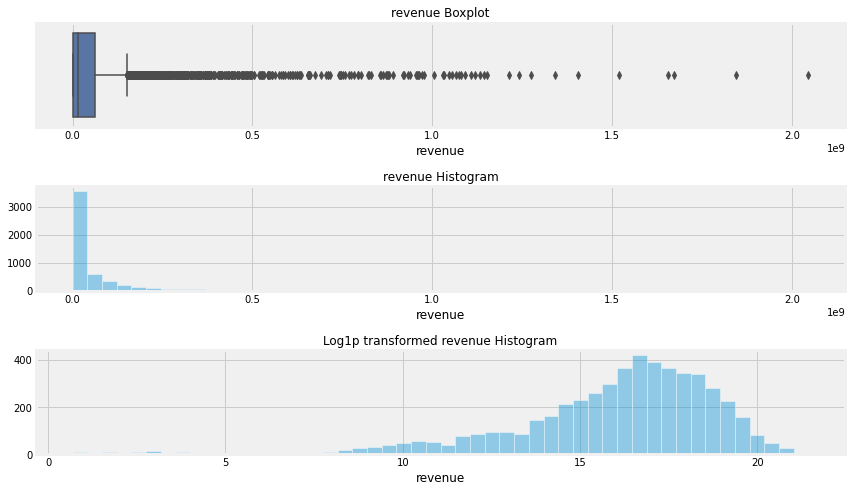

In [ ]:
##revenue

f, ax = plt.subplots(3, figsize=(12,7))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.revenue, ax = ax[0])
ax[0].set_title("revenue Boxplot")
sns.distplot(a=df.revenue, kde = False, ax = ax[1])
ax[1].set_title("revenue Histogram")
sns.distplot(a=np.log1p(df.revenue), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed revenue Histogram")
f.tight_layout()

df["log_revenue"] = np.log1p(df.revenue)

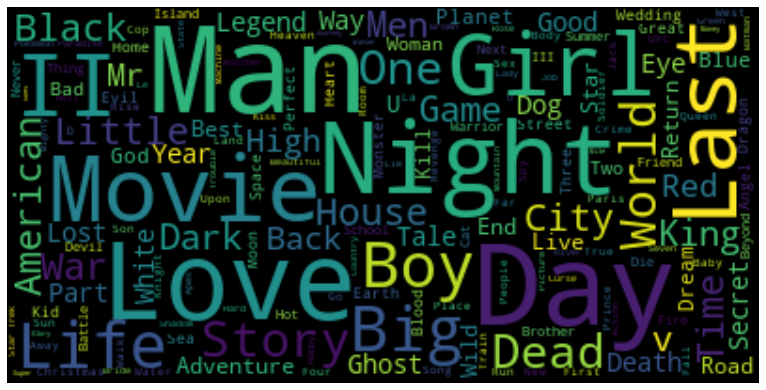

In [ ]:
##Title
wordcloud = WordCloud().generate(df.title.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

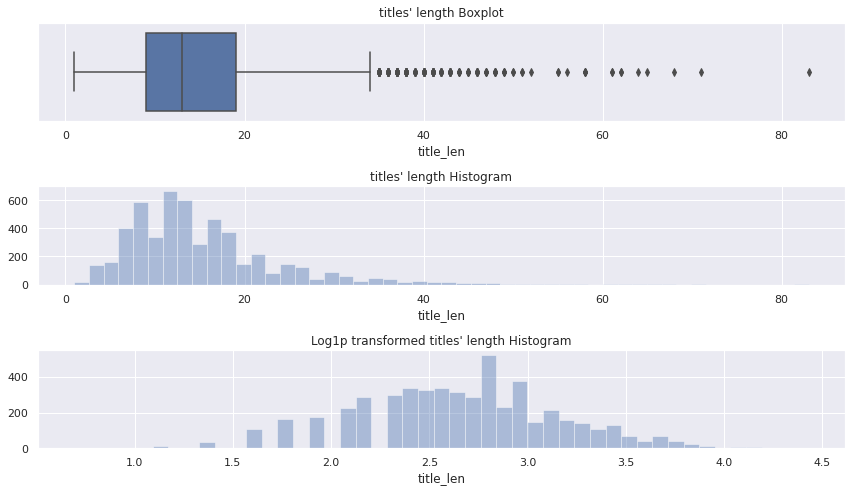

In [ ]:
df["title"] = df["title"].fillna("")

df["title_len"] = df["title"].apply(len)

f, ax = plt.subplots(3, figsize=(12,7))
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.title_len, ax = ax[0])
ax[0].set_title("titles' length Boxplot")
sns.distplot(a=df.title_len, kde = False, ax = ax[1])
ax[1].set_title("titles' length Histogram")
sns.distplot(a=np.log1p(df.title_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed titles' length Histogram")
f.tight_layout()

df["log_title_len"] = np.log1p(df.title_len)


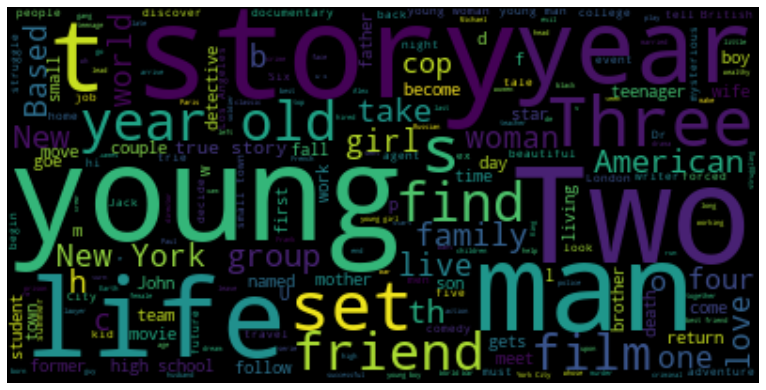

In [ ]:
##Overview
wordcloud = WordCloud().generate(df.overview.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

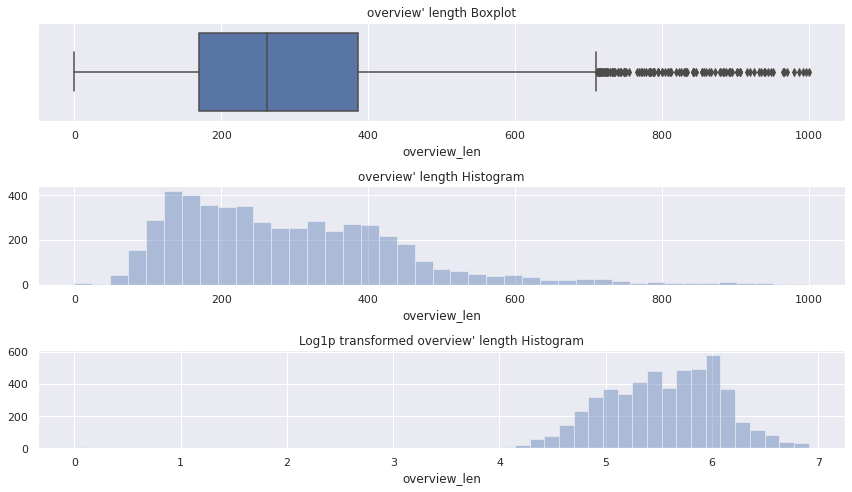

In [ ]:
df["overview"] = df["overview"].fillna("")


df["overview_len"] = df["overview"].apply(len)


f, ax = plt.subplots(3, figsize=(12,7))
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.overview_len, ax = ax[0])
ax[0].set_title("overview' length Boxplot")
sns.distplot(a=df.overview_len, kde = False, ax = ax[1])
ax[1].set_title("overview' length Histogram")
sns.distplot(a=np.log1p(df.overview_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed overview' length Histogram")
f.tight_layout()

df["log_overview_len"] = np.log1p(df.overview_len)


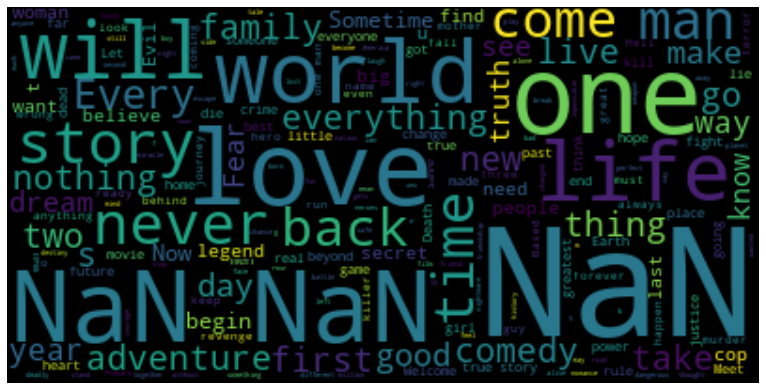

In [ ]:
##Tagline
wordcloud = WordCloud().generate(df.tagline.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

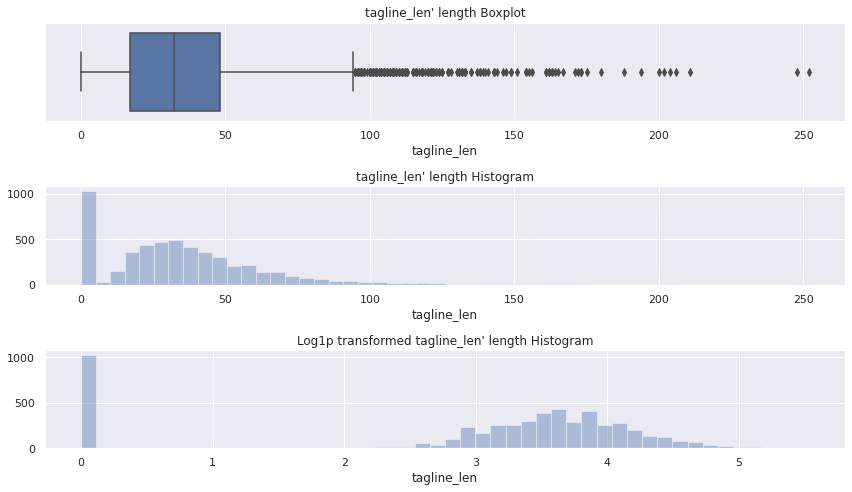

In [ ]:
df["tagline"] = df["tagline"].fillna("")

df["tagline_len"] = df["tagline"].apply(len)

f, ax = plt.subplots(3, figsize=(12,7))
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.tagline_len, ax = ax[0])
ax[0].set_title("tagline_len' length Boxplot")
sns.distplot(a=df.tagline_len, kde = False, ax = ax[1])
ax[1].set_title("tagline_len' length Histogram")
sns.distplot(a=np.log1p(df.tagline_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed tagline_len' length Histogram")
f.tight_layout()

df["log_tagline_len"] = np.log1p(df.tagline_len)


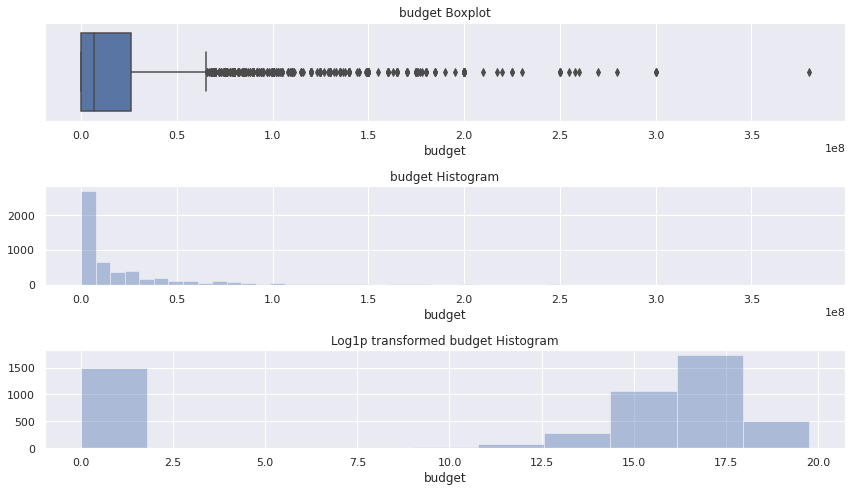

In [ ]:
##Budget
f, ax = plt.subplots(3, figsize=(12,7))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.budget, ax = ax[0])
ax[0].set_title("budget Boxplot")
sns.distplot(a=df.budget, kde = False, ax = ax[1])
ax[1].set_title("budget Histogram")
sns.distplot(a=np.log1p(df.budget), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed budget Histogram")
f.tight_layout()

df["log_budget"] = np.log1p(df.budget)

Text(0.5, 1.0, 'Number of films per genre')

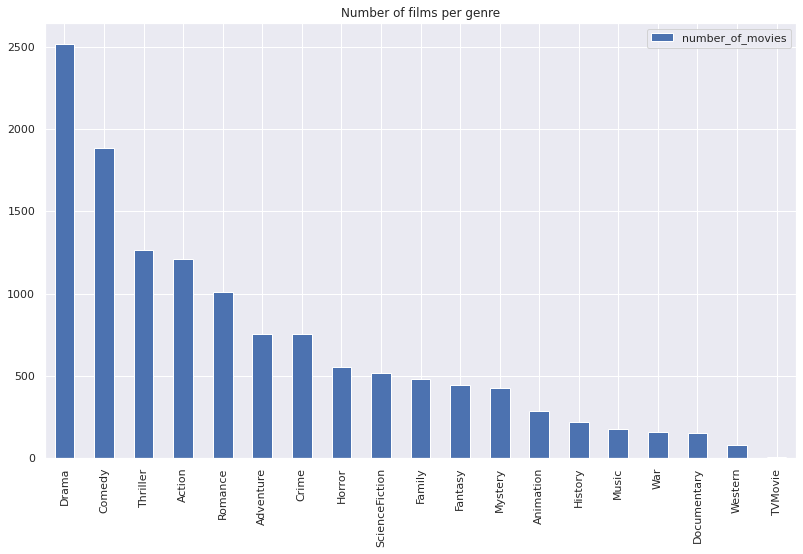

In [ ]:
##Genres
def genres_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace("name", "").replace("id", "").replace(":", "")
    ll = str1.split(",")[1::2]
    return ll

df["genres_processed"] = df.genres.apply(lambda elem: genres_preprocessing(elem))


genres_dict = dict()

for genre in df["genres_processed"]:
    for elem in genre:
        if elem not in genres_dict:
            genres_dict[elem] = 1
        else:
            genres_dict[elem] += 1


sns.set(rc={'figure.figsize':(12,8)})
genres_df = pd.DataFrame.from_dict(genres_dict, orient='index')
genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by="number_of_movies", ascending=False)
genres_df.plot.bar()
plt.title("Number of films per genre")

Text(0.5, 1.0, 'Number of films with more than 1 genre')

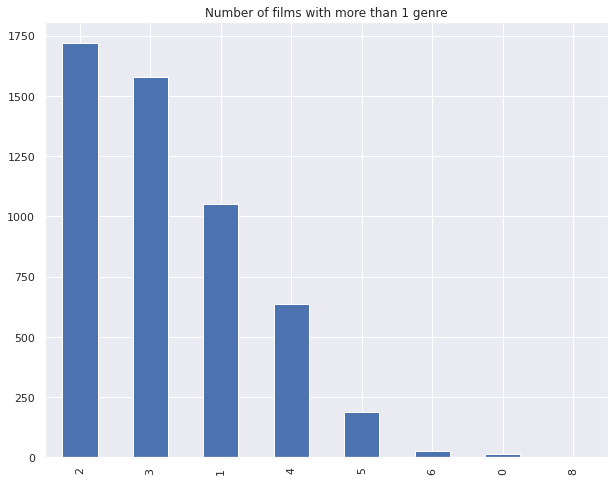

In [ ]:
sns.set(rc={'figure.figsize':(9,8)})
df['num_genres'] = df['genres_processed'].apply(lambda x: len(x) if x != {} else 0)


df['num_genres'].value_counts().plot.bar()
plt.title("Number of films with more than 1 genre")

In [ ]:
genres_df.index.values
for g in genres_df.index.values:
    df['isGenre_' + g] = df['genres_processed'].apply(lambda x: 1 if g in x else 0)


In [ ]:
df.columns

Index(['backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'Keywords', 'cast', 'crew', 'log_revenue',
       'title_len', 'log_title_len', 'overview_len', 'log_overview_len',
       'tagline_len', 'log_tagline_len', 'log_budget', 'genres_processed',
       'num_genres', 'isGenre_Drama', 'isGenre_Comedy', 'isGenre_Thriller',
       'isGenre_Action', 'isGenre_Romance', 'isGenre_Adventure',
       'isGenre_Crime', 'isGenre_Horror', 'isGenre_ScienceFiction',
       'isGenre_Family', 'isGenre_Fantasy', 'isGenre_Mystery',
       'isGenre_Animation', 'isGenre_History', 'isGenre_Music', 'isGenre_War',
       'isGenre_Documentary', 'isGenre_Western', 'isGenre_TVMovie'],
 

Text(0.5, 1.0, 'Number of films per language')

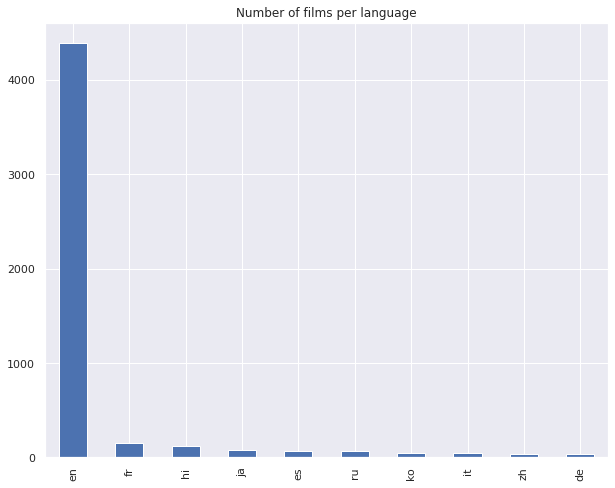

In [ ]:
##Original Language
df.original_language.value_counts()[:10].plot.bar()
plt.title("Number of films per language")

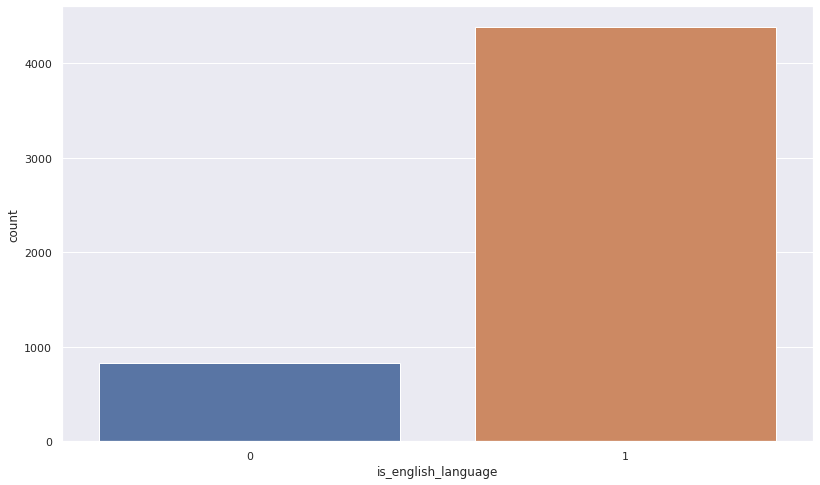

In [ ]:
df["is_english_language"] = df.original_language.apply(lambda x: 1 if x == "en" else 0)


df.is_english_language = df.is_english_language.fillna(1)


sns.set(rc={'figure.figsize':(12,8)})
ax = sns.countplot(x="is_english_language", data=df)

Text(0.5, 1.0, 'Number of films per production company')

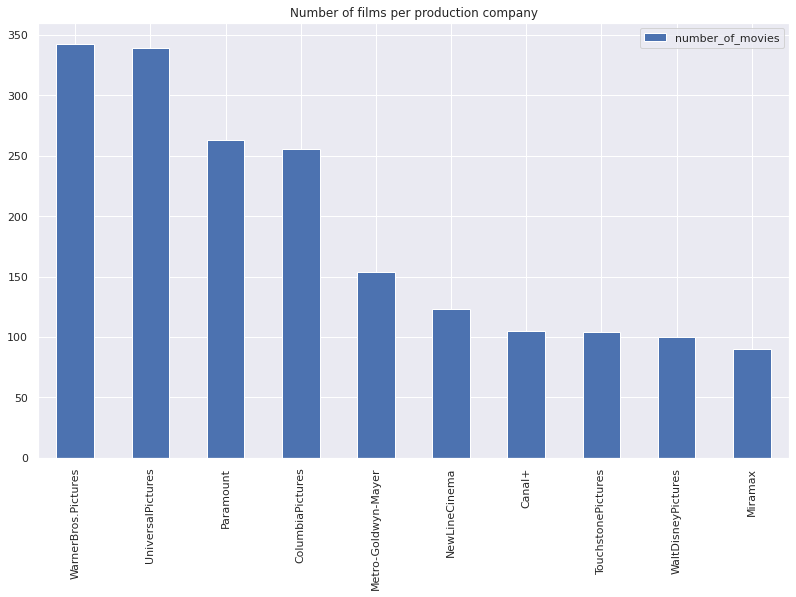

In [ ]:
##Production Companies
def production_companies_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("id", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

df["production_companies"] = df.production_companies.fillna('NoProductionCompany')


df["production_companies_processed"] = df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))




production_companies_dict = dict()
num = ['1','2','3','4','5','6','7','8','9','0']

for production_company in df["production_companies_processed"]:
    for elem in production_company:
        if len(elem) > 0:
          if elem not in production_companies_dict:
              if elem[0] not in num:
                production_companies_dict[elem] = 1
          else:
              production_companies_dict[elem] += 1


sns.set(rc={'figure.figsize':(12,8)})
production_companies_df = pd.DataFrame.from_dict(production_companies_dict, orient='index')
production_companies_df.columns = ["number_of_movies"]
production_companies_df = production_companies_df.sort_values(by="number_of_movies", ascending=False)
production_companies_df.head(10).plot.bar()
plt.title("Number of films per production company")

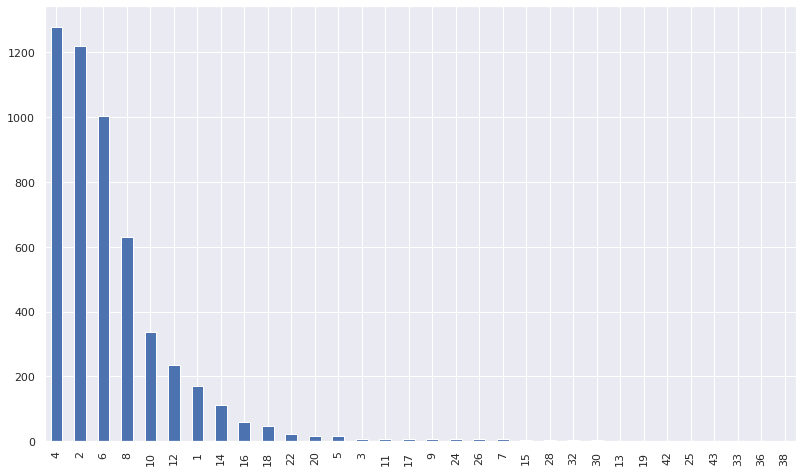

In [ ]:
##Number of Production Companies
df["num_of_production_companies"] = df.production_companies_processed.apply(len)


df["num_of_production_companies"].value_counts().plot.bar()


In [ ]:
##isProductionCompany
for g in production_companies_df.index.values:
    df['isProductionCompany_' + g] = df['production_companies_processed'].apply(lambda x: 1 if g in x else 0)


Text(0.5, 1.0, 'Number of films per production country')

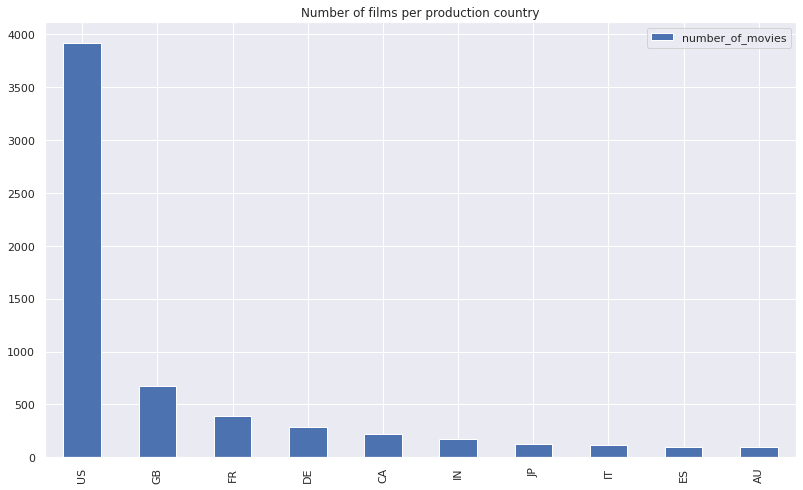

In [ ]:
##production_countries
def production_countries_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("iso_3166_1", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

df["production_countries_processed"] = df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))


production_countries_dict = dict()

for production_country in df["production_countries_processed"]:
    for elem in production_country:
        if elem not in production_countries_dict:
            production_countries_dict[elem] = 1
        else:
            production_countries_dict[elem] += 1



production_countries_df = pd.DataFrame.from_dict(production_countries_dict, orient='index')
production_countries_df.columns = ["number_of_movies"]
production_countries_df = production_countries_df.sort_values(by="number_of_movies", ascending=False)
production_countries_df.head(10).plot.bar()
plt.title("Number of films per production country")

In [ ]:
##isProduction_country
for c in production_countries_df.index.values:
    df['isProductionCountry_' + c] = df['production_countries_processed'].apply(lambda x: 1 if c in x else 0)


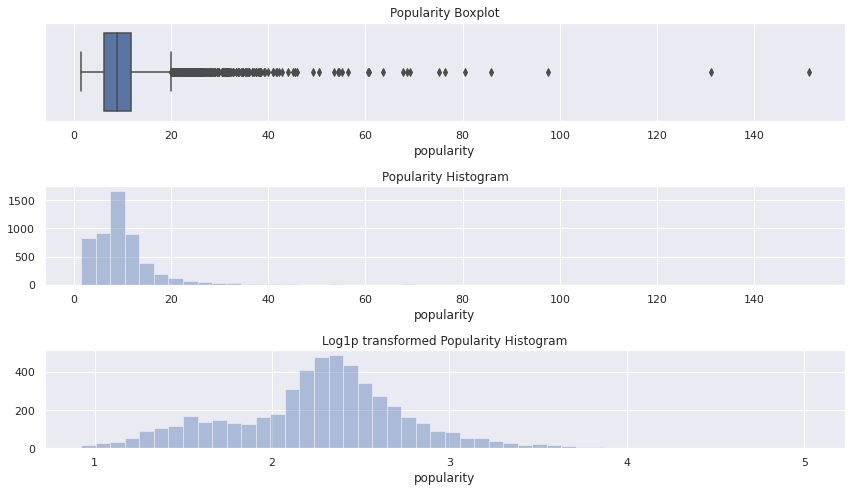

In [ ]:
##popularity
f, ax = plt.subplots(3, figsize=(12,7))
sns.boxplot(x=df.popularity, ax = ax[0])
ax[0].set_title("Popularity Boxplot")
sns.distplot(a=df.popularity, kde = False, ax = ax[1])
ax[1].set_title("Popularity Histogram")
sns.distplot(a=np.log1p(df.popularity), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed Popularity Histogram")
f.tight_layout()

df["log_popularity"] = np.log1p(df.popularity)


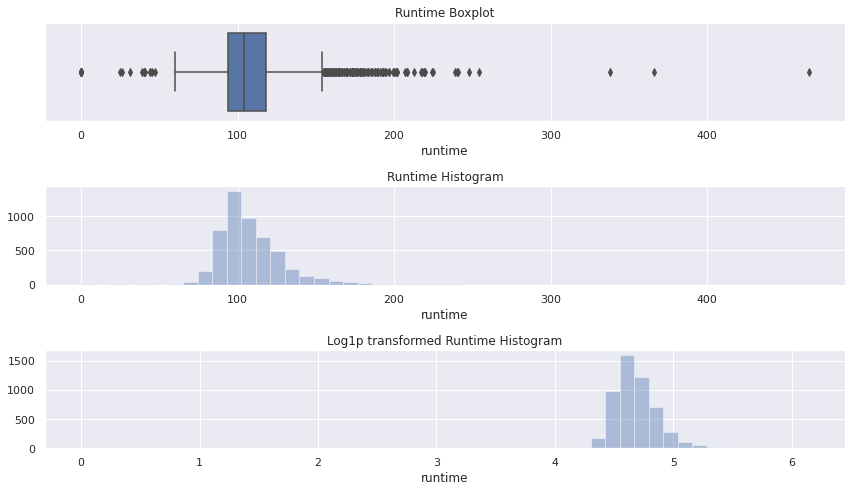

In [ ]:
##Runtime
df["runtime"] = df["runtime"].fillna(df["runtime"].mode()[0])


f, ax = plt.subplots(3, figsize=(12,7))

df.runtime = df.runtime.fillna(df.runtime.mode())

sns.boxplot(x=df.runtime, ax = ax[0])
ax[0].set_title("Runtime Boxplot")
sns.distplot(a=df.runtime, kde = False, ax = ax[1])
ax[1].set_title("Runtime Histogram")
sns.distplot(a=np.log1p(df.runtime), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed Runtime Histogram")
f.tight_layout()

df["runtime_in_hours"] = df.runtime/360


df["log_runtime"] = np.log1p(df.runtime)


In [ ]:
from datetime import datetime

# fill possible NA values with the statistical mode
df["release_date"] = df["release_date"].fillna(df["release_date"].mode()[0])



df['temp'] = df.release_date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

df["month"] = df.temp.apply(lambda x: x.month)
df["season"] = df["month"]%4
df["year"] = df.temp.apply(lambda x: x.year)
df["day_of_week"] = df.temp.apply(lambda x: x.weekday()+1)
df["week_of_year"] = df.temp.apply(lambda x: x.isocalendar()[1])

df = df.drop(['temp'], axis=1)

df["day_of_week"] = df["day_of_week"].fillna(df["day_of_week"].mode()[0])

df["year"] = df["year"].fillna(df["year"].mode()[0])

df["month"] = df["month"].fillna(df["month"].mode()[0])

df["week_of_year"] = df["week_of_year"].fillna(df["week_of_year"].mode()[0])

df["season"] = df["season"].fillna(df["season"].mode()[0])

df[["release_date", "month", "year", "day_of_week", "week_of_year", "season"]].head(10)

,release_date,month,year,day_of_week,week_of_year,season
0,2007-05-01,5,2007,2,18,1
1,1987-04-10,4,1987,5,15,0
2,2018-07-27,7,2018,5,30,3
3,1987-09-11,9,1987,5,37,1
4,1983-07-28,7,1983,4,30,3
5,1986-12-31,12,1986,3,1,0
6,2011-02-14,2,2011,1,7,2
7,2018-01-20,1,2018,6,3,1
8,1991-11-30,11,1991,6,48,3
9,2014-03-21,3,2014,5,12,3


Text(0.5, 1.0, 'Number of films per month')

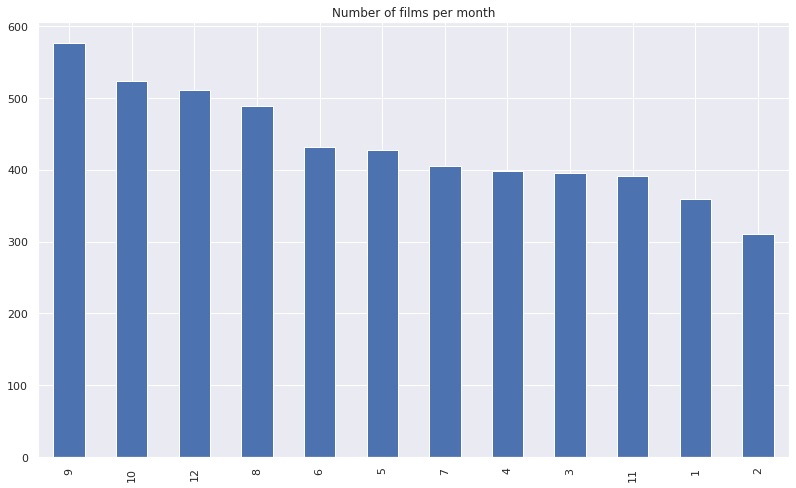

In [ ]:
##Month of Release
sns.set(rc={'figure.figsize':(12,8)})
df.month.value_counts().plot.bar()
plt.title('Number of films per month')

Text(0.5, 1.0, 'Number of films per week_of_year')

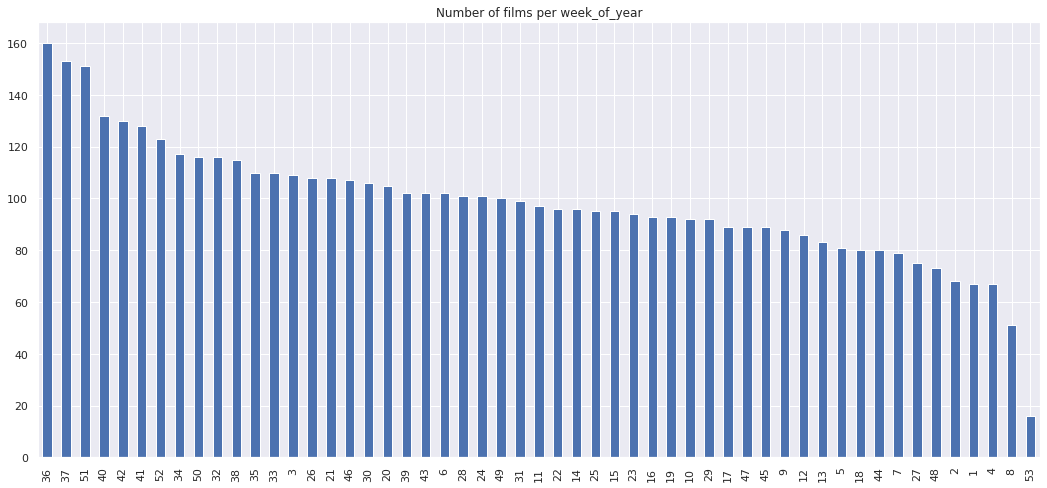

In [ ]:
##Week of year
sns.set(rc={'figure.figsize':(16,8)})
df.week_of_year.value_counts().plot.bar()
plt.title('Number of films per week_of_year')

Text(0.5, 1.0, 'Number of films per season')

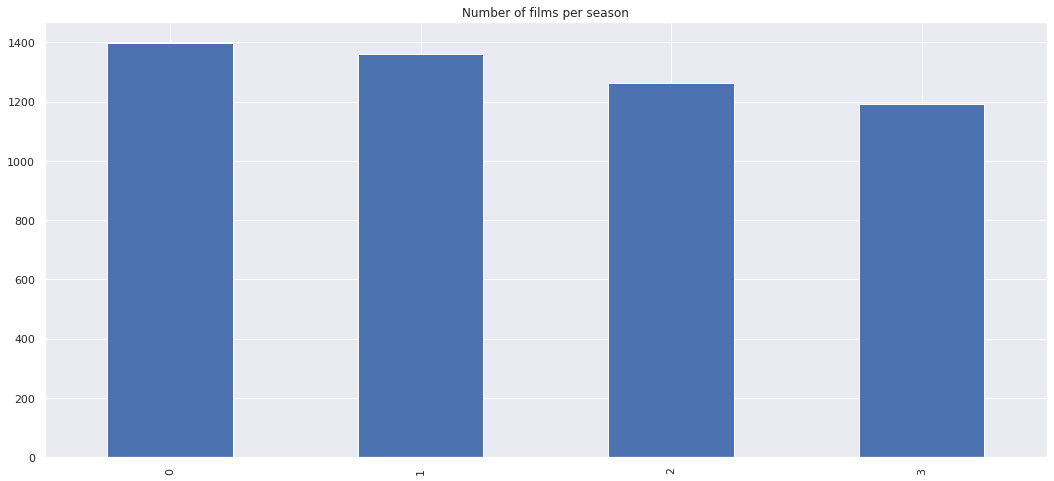

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})
df.season.value_counts().plot.bar()
plt.title('Number of films per season')

Text(0.5, 1.0, 'Number of films per day_of_week')

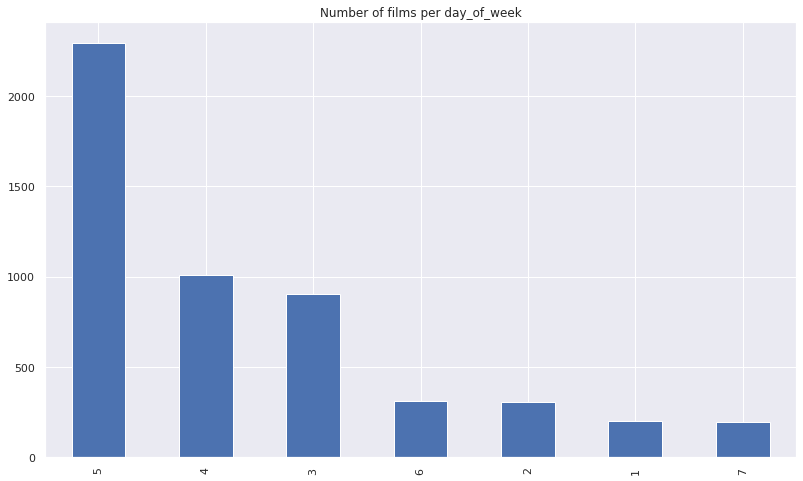

In [ ]:
##Day of Release
sns.set(rc={'figure.figsize':(12,8)})
df.day_of_week.value_counts().plot.bar()
plt.title('Number of films per day_of_week')

Text(0.5, 1.0, 'Number of films per year')

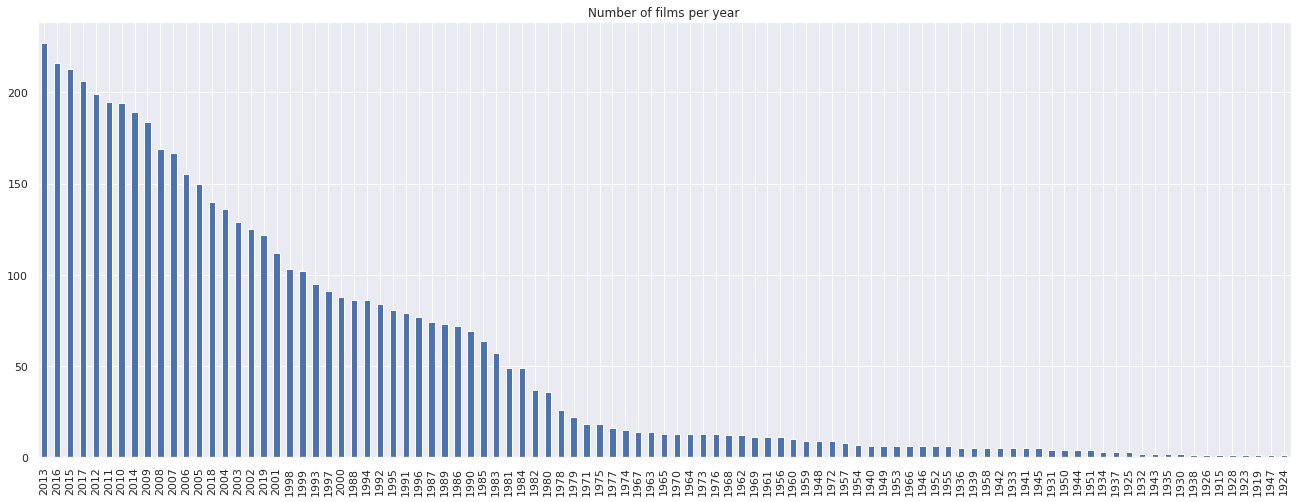

In [ ]:
##Year of Release
sns.set(rc={'figure.figsize':(20,8)})
df.year.value_counts().plot.bar()
plt.title('Number of films per year')

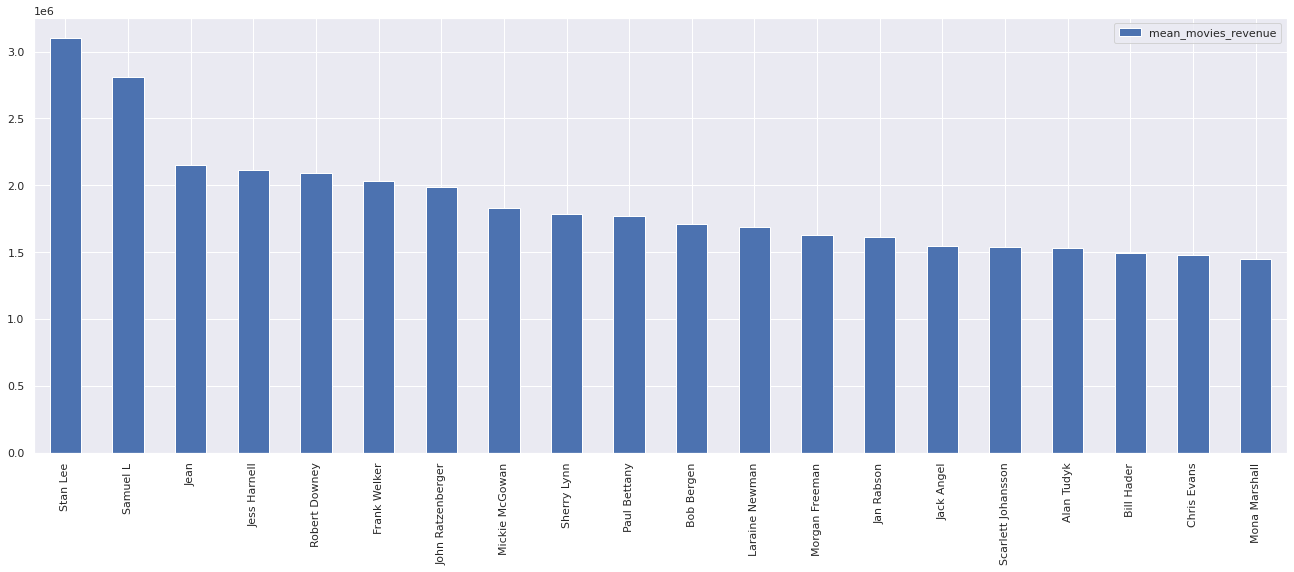

In [ ]:
##actors

import re

actors_dict = {}
size_of_actors = len(df) - df.cast.isna().sum()

for element in df[["revenue", "cast"]].values:
    if type(element[1]) == type(str()):

        result = re.findall('name\': \'\w+\s*\w*', element[1])
        result = [x.replace("name\': \'", "") for x in result]

        for actor in result:
          if len(actor) > 1:
            if actor not in actors_dict:
                actors_dict[actor] = element[0]
            else:
                actors_dict[actor] += element[0]

for actor in actors_dict:
    actors_dict[actor] = actors_dict[actor]/size_of_actors



actors_df = pd.DataFrame.from_dict(actors_dict, orient='index', columns=["mean_movies_revenue"])
actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(20).plot.bar()

In [ ]:
def find_top_actor_from_cast(top_actor, element):

    result = []
    if type(element) == type(str()):

        result = re.findall('name\': \'\w+\s*\w*', element)
        result = [x.replace("name\': \'", "") for x in result]

    if top_actor in result:
        return 1
    else:
        return 0

for top_actor in actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
    df["has_top_actor_"+ top_actor] = df.cast.apply(lambda element: find_top_actor_from_cast(top_actor, element))

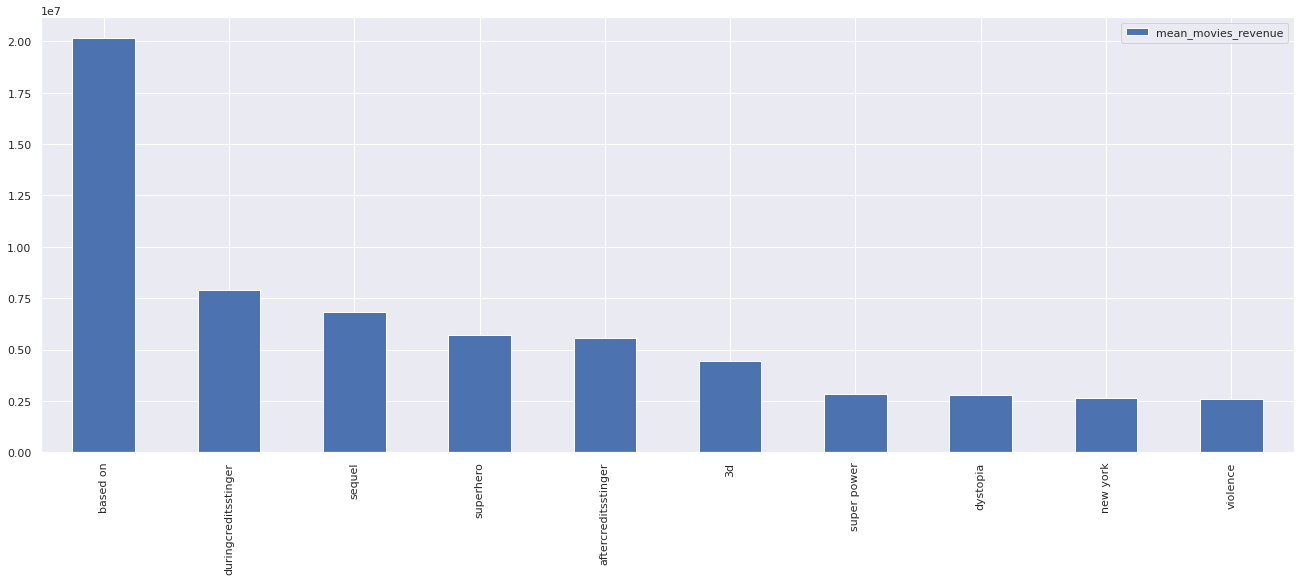

In [ ]:
##top keywords

keywords_dict = {}
size_of_keywords = len(df) - df.Keywords.isna().sum()

for element in df[["revenue", "Keywords"]].values:
    if type(element[1]) == type(str()):

        result = re.findall('name\': \'\w+\s*\w*', element[1])
        result = [x.replace("name\': \'", "") for x in result]

        for key in result:
            if key not in keywords_dict:
                keywords_dict[key] = element[0]
            else:
                keywords_dict[key] += element[0]

for key in keywords_dict:
    keywords_dict[key] = keywords_dict[key]/size_of_keywords

keywords_df = pd.DataFrame.from_dict(keywords_dict, orient='index', columns=["mean_movies_revenue"])
keywords_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).plot.bar()

In [ ]:
def find_top_keywords_from_cast(top_keyword, element):

    result = []
    if type(element) == type(str()):

        result = re.findall('name\': \'\w+\s*\w*', element)
        result = [x.replace("name\': \'", "") for x in result]

    if top_keyword in result:
        return 1
    else:
        return 0

for top_keyword in keywords_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
    df["has_top_keyword_"+ top_keyword] = df.Keywords.apply(lambda element: find_top_keywords_from_cast(top_keyword, element))

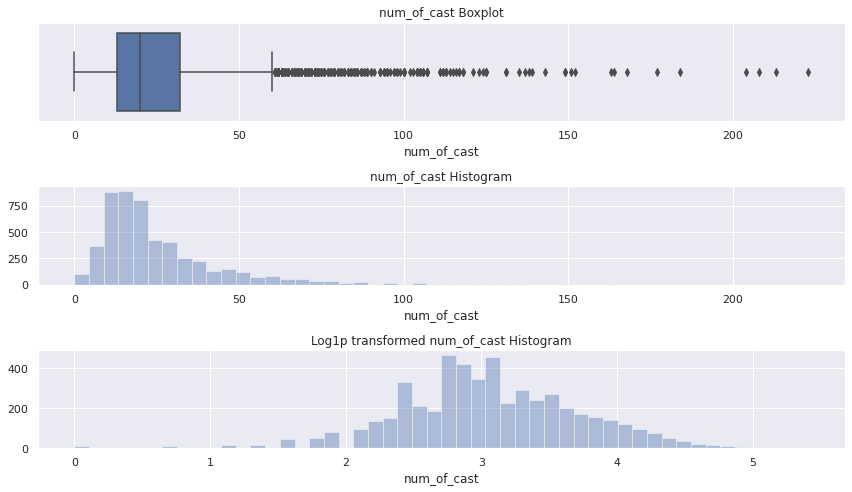

In [ ]:
##Cast
df["num_of_cast"] = df["cast"].str.count("name")

f, ax = plt.subplots(3, figsize=(12,7))

df.num_of_cast = df.num_of_cast.fillna(0)

sns.boxplot(x=df.num_of_cast, ax = ax[0])
ax[0].set_title("num_of_cast Boxplot")
sns.distplot(a=df.num_of_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_cast Histogram")
sns.distplot(a=np.log1p(df.num_of_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_cast Histogram")
f.tight_layout()


df["log_num_of_cast"] = np.log1p(df.num_of_cast)



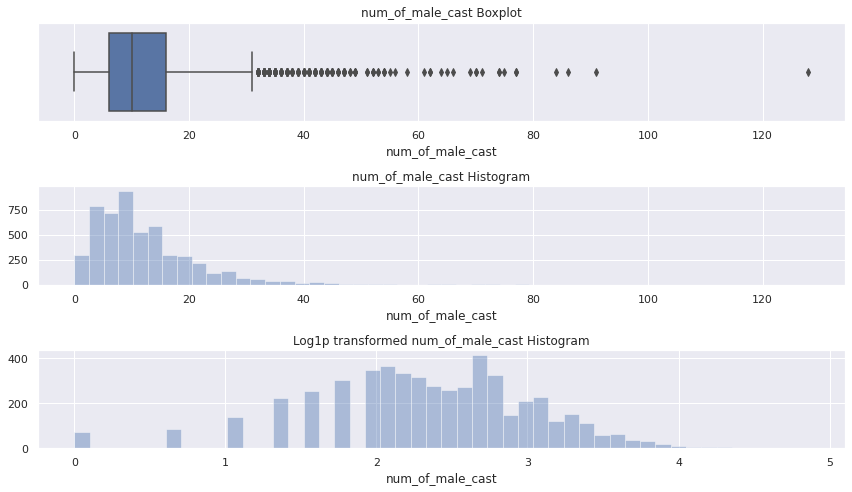

In [ ]:
##Male cast
df["num_of_male_cast"] = df["cast"].str.count("'gender': 2")


f, ax = plt.subplots(3, figsize=(12,7))

df.num_of_male_cast = df.num_of_male_cast.fillna(0)


sns.boxplot(x=df.num_of_male_cast, ax = ax[0])
ax[0].set_title("num_of_male_cast Boxplot")
sns.distplot(a=df.num_of_male_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_male_cast Histogram")
sns.distplot(a=np.log1p(df.num_of_male_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_male_cast Histogram")
f.tight_layout()


df["log_num_of_male_cast"] = np.log1p(df.num_of_male_cast)


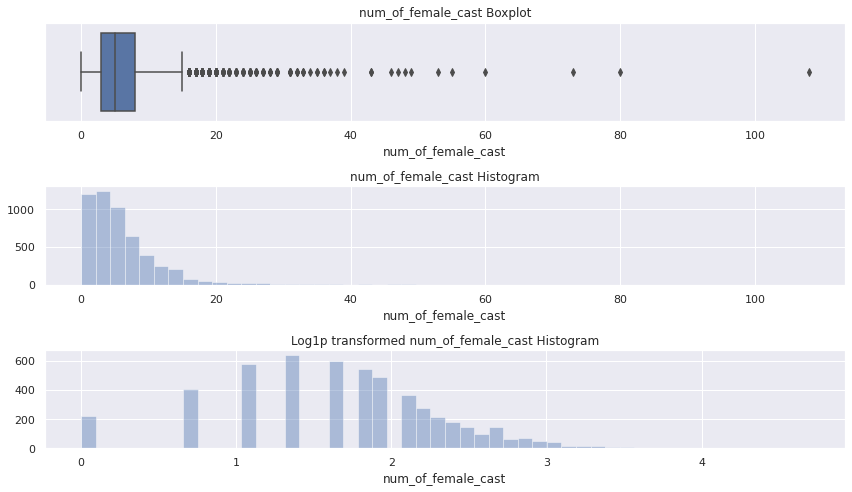

In [ ]:
##Female cast
df["num_of_female_cast"] = df["cast"].str.count("'gender': 1")

f, ax = plt.subplots(3, figsize=(12,7))

df.num_of_female_cast = df.num_of_female_cast.fillna(0)

sns.boxplot(x=df.num_of_female_cast, ax = ax[0])
ax[0].set_title("num_of_female_cast Boxplot")
sns.distplot(a=df.num_of_female_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_female_cast Histogram")
sns.distplot(a=np.log1p(df.num_of_female_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_female_cast Histogram")
f.tight_layout()

df["log_num_of_female_cast"] = np.log1p(df.num_of_female_cast)


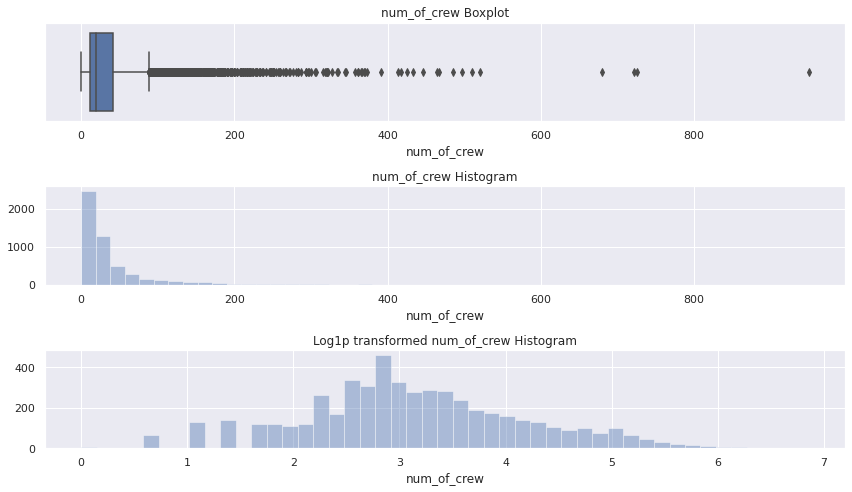

In [ ]:
##Crew
df["num_of_crew"] = df["crew"].str.count("'job")

f, ax = plt.subplots(3, figsize=(12,7))

df.num_of_crew = df.num_of_crew.fillna(0)

sns.boxplot(x=df.num_of_crew, ax = ax[0])
ax[0].set_title("num_of_crew Boxplot")
sns.distplot(a=df.num_of_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_crew Histogram")
sns.distplot(a=np.log1p(df.num_of_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_crew Histogram")
f.tight_layout()

df["log_num_of_crew"] = np.log1p(df.num_of_crew)


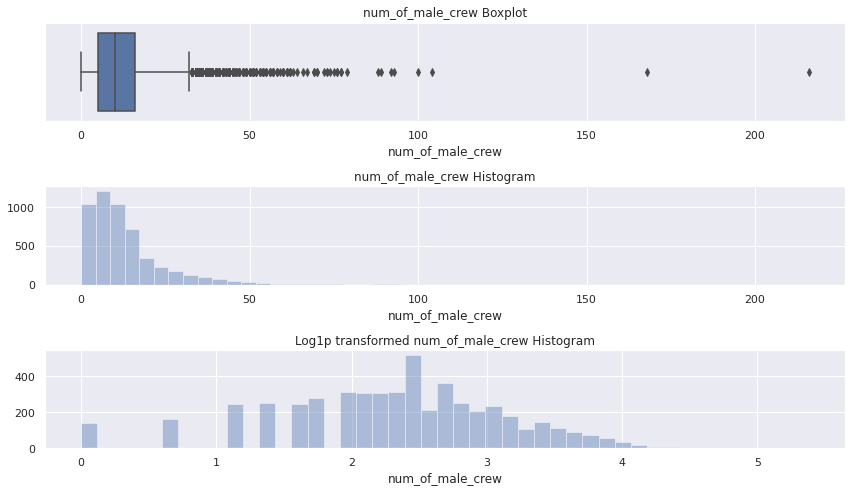

In [ ]:
##Male Crew
df["num_of_male_crew"] = df["crew"].str.count("'gender': 2")

f, ax = plt.subplots(3, figsize=(12,7))

df.num_of_male_crew = df.num_of_male_crew.fillna(0)

sns.boxplot(x=df.num_of_male_crew, ax = ax[0])
ax[0].set_title("num_of_male_crew Boxplot")
sns.distplot(a=df.num_of_male_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_male_crew Histogram")
sns.distplot(a=np.log1p(df.num_of_male_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_male_crew Histogram")
f.tight_layout()

df["log_num_of_male_crew"] = np.log1p(df.num_of_male_crew)

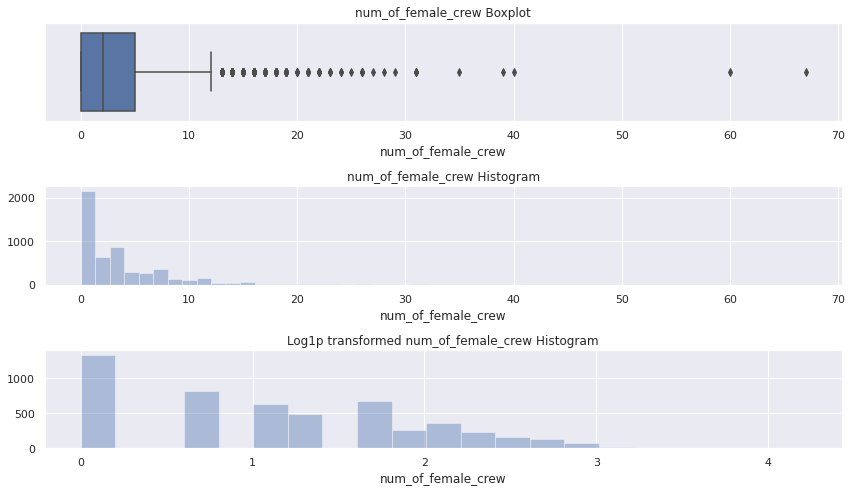

In [ ]:
##Female Crew
df["num_of_female_crew"] = df["crew"].str.count("'gender': 1")

f, ax = plt.subplots(3, figsize=(12,7))

df.num_of_female_crew = df.num_of_female_crew.fillna(0)

sns.boxplot(x=df.num_of_female_crew, ax = ax[0])
ax[0].set_title("num_of_female_crew Boxplot")
sns.distplot(a=df.num_of_female_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_female_crew Histogram")
sns.distplot(a=np.log1p(df.num_of_female_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_female_crew Histogram")
f.tight_layout()

df["log_num_of_female_crew"] = np.log1p(df.num_of_female_crew)

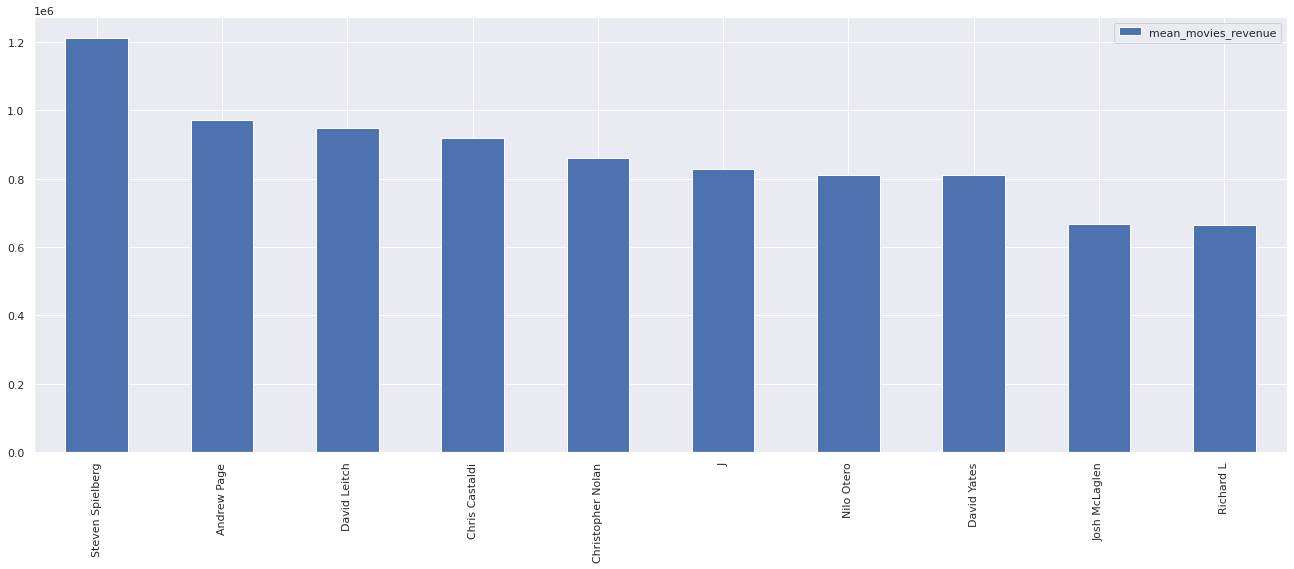

In [ ]:
##directors
directors_dict = {}
size_of_crew = len(df) - df.crew.isna().sum()

for element in df[["revenue", "crew"]].values:
    if type(element[1]) == type(str()):

        result = re.findall('Director\', \'name\': \'\w+\s*\w*', element[1])
        result = [x.replace("Director\', \'name\': \'", "") for x in result]

        for key in result:
            if key not in directors_dict:
                directors_dict[key] = element[0]
            else:
                directors_dict[key] += element[0]

for key in directors_dict:
    directors_dict[key] = directors_dict[key]/size_of_crew

directors_df = pd.DataFrame.from_dict(directors_dict, orient='index', columns=["mean_movies_revenue"])
directors_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).plot.bar()

In [ ]:
def find_top_directors_from_crew(top_director, element):

    result = []
    if type(element) == type(str()):

        result = re.findall('Director\', \'name\': \'\w+\s*\w*', element)
        result = [x.replace("Director\', \'name\': \'", "") for x in result]

    if top_director in result:
        return 1
    else:
        return 0

for top_director in directors_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
    df["has_top_director_"+ top_director] = df.crew.apply(lambda element: find_top_directors_from_crew(top_director, element))

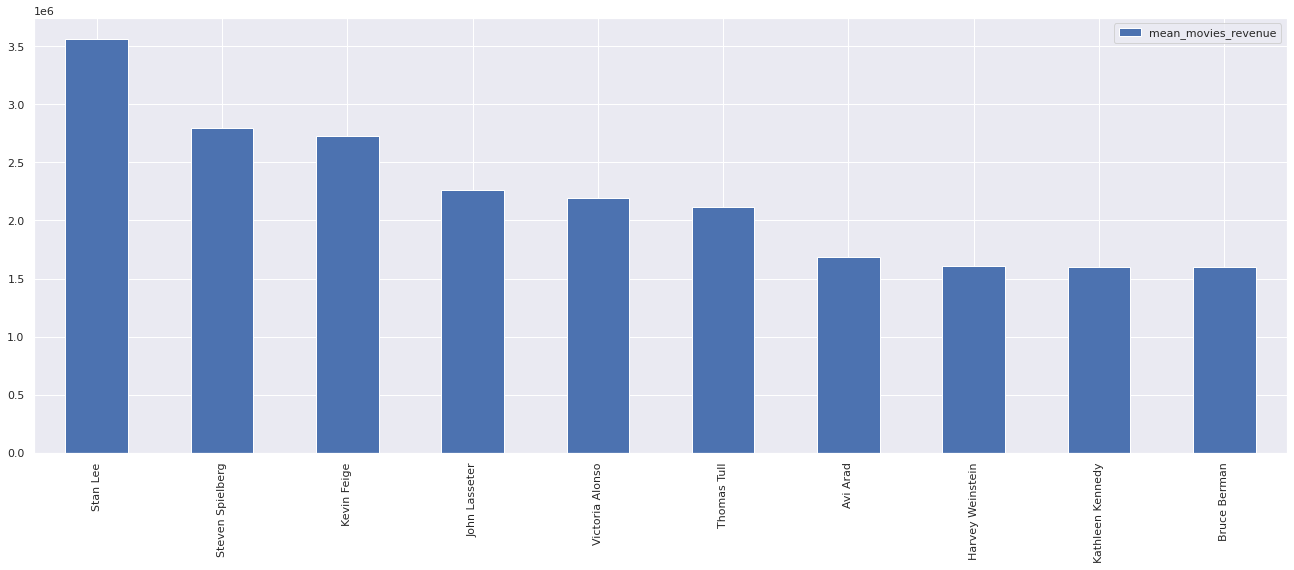

In [ ]:
##Producers
producers_dict = {}
size_of_crew = len(df) - df.crew.isna().sum()

for element in df[["revenue", "crew"]].values:
    if type(element[1]) == type(str()):

        result = re.findall('Producer\', \'name\': \'\w+\s*\w*', element[1])
        result = [x.replace("Producer\', \'name\': \'", "") for x in result]

        for key in result:
            if key not in producers_dict:
                producers_dict[key] = element[0]
            else:
                producers_dict[key] += element[0]

for key in producers_dict:
    producers_dict[key] = producers_dict[key]/size_of_crew

producers_df = pd.DataFrame.from_dict(producers_dict, orient='index', columns=["mean_movies_revenue"])
producers_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).plot.bar()

In [ ]:
def find_top_producers_from_crew(top_producer, element):

    result = []
    if type(element) == type(str()):

        result = re.findall('Director\', \'name\': \'\w+\s*\w*', element)
        result = [x.replace("Director\', \'name\': \'", "") for x in result]

    if top_producer in result:
        return 1
    else:
        return 0

for top_producer in producers_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
    df["has_top_producer_"+ top_producer] = df.crew.apply(lambda element: find_top_producers_from_crew(top_producer, element))

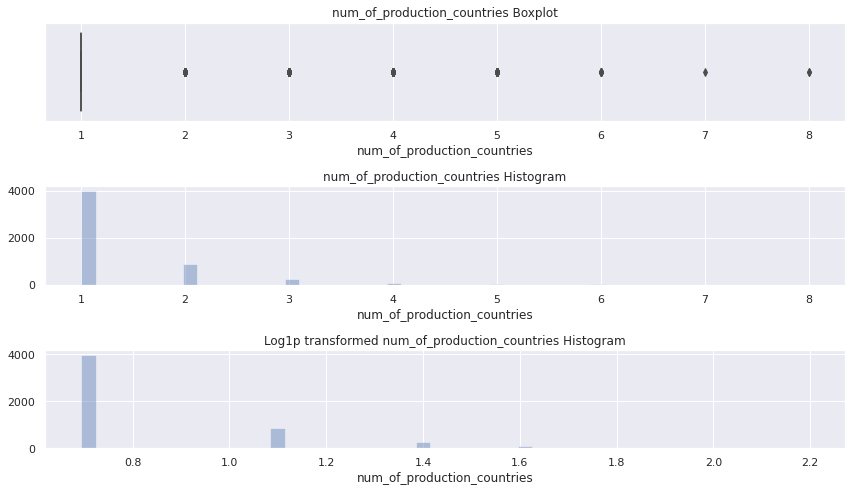

In [ ]:
##Production Countries
df["num_of_production_countries"] = df.production_countries_processed.apply(len)

f, ax = plt.subplots(3, figsize=(12,7))

df.num_of_production_countries = df.num_of_production_countries.fillna(0)

sns.boxplot(x=df.num_of_production_countries, ax = ax[0])
ax[0].set_title("num_of_production_countries Boxplot")
sns.distplot(a=df.num_of_production_countries, kde = False, ax = ax[1])
ax[1].set_title("num_of_production_countries Histogram")
sns.distplot(a=np.log1p(df.num_of_production_countries), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_production_countries Histogram")
f.tight_layout()

df["log_num_of_production_countries"] = np.log1p(df.num_of_production_countries)


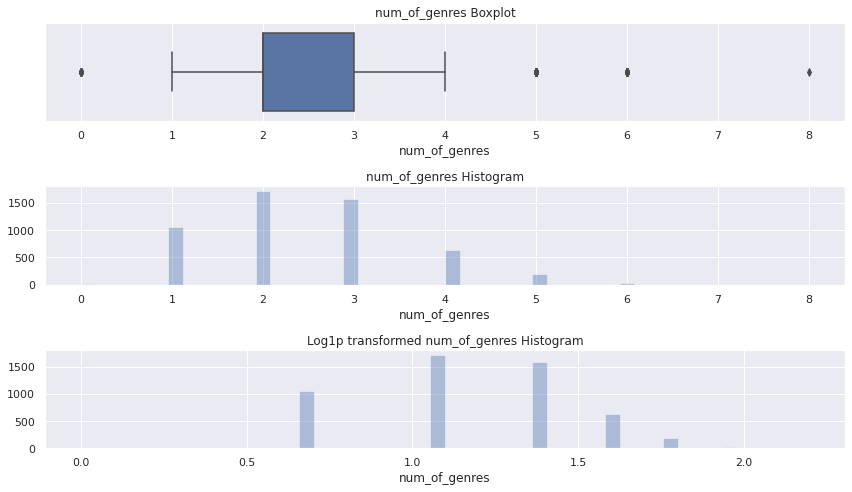

In [ ]:
##Number of Genres
df["num_of_genres"] = df.genres_processed.apply(len)

f, ax = plt.subplots(3, figsize=(12,7))

df.num_of_genres = df.num_of_genres.fillna(0)

sns.boxplot(x=df.num_of_genres, ax = ax[0])
ax[0].set_title("num_of_genres Boxplot")
sns.distplot(a=df.num_of_genres, kde = False, ax = ax[1])
ax[1].set_title("num_of_genres Histogram")
sns.distplot(a=np.log1p(df.num_of_genres), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_genres Histogram")
f.tight_layout()


df["log_num_of_genres"] = np.log1p(df.num_of_genres)


eda

Text(0.5, 1.0, 'Correlation between numerical features')

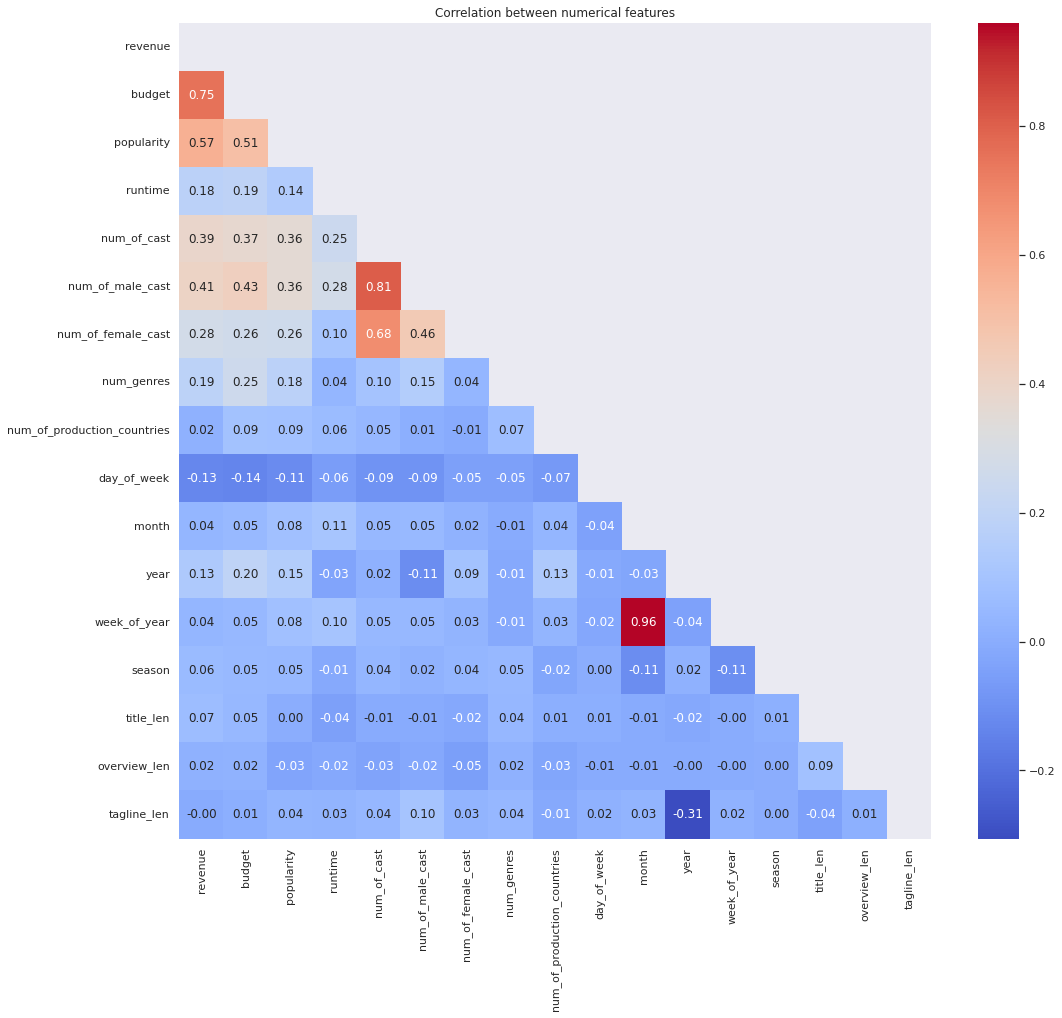

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})

# Compute the correlation matrix
corr = df[["revenue", "budget", "popularity", "runtime", "num_of_cast", "num_of_male_cast",
                 "num_of_female_cast",
                 "num_genres", "num_of_production_countries", "day_of_week", "month", "year", "week_of_year", "season",
                 "title_len", "overview_len", "tagline_len"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask,
            annot=True,
            fmt=".2f",
            cmap='coolwarm')

plt.title("Correlation between numerical features")

Text(0.5, 1.0, 'Correlation between log1p transformed numerical features')

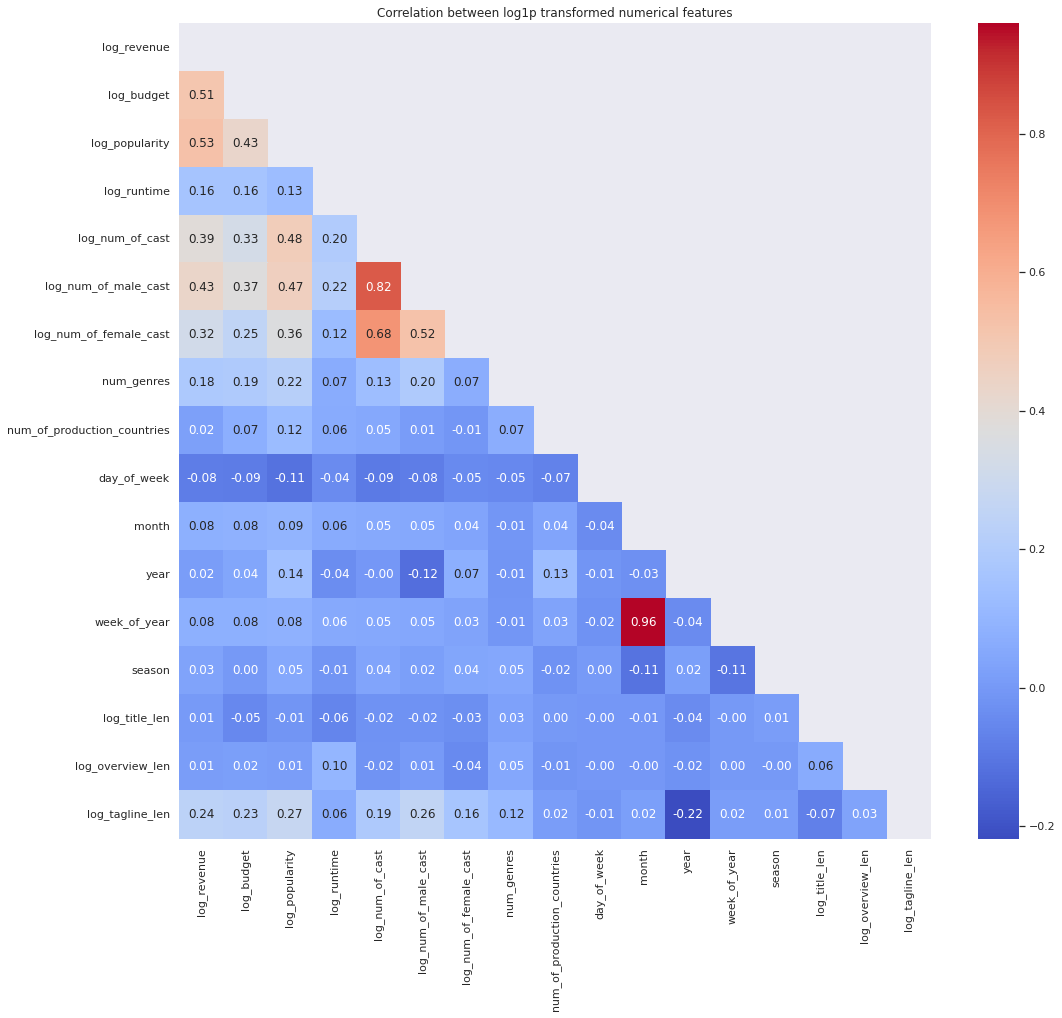

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})

# Compute the correlation matrix
corr = df[["log_revenue", "log_budget", "log_popularity", "log_runtime",
                 "log_num_of_cast", "log_num_of_male_cast",
                 "log_num_of_female_cast", "num_genres", "num_of_production_countries",
                "day_of_week", "month", "year", "week_of_year", "season",
                "log_title_len", "log_overview_len", "log_tagline_len"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask,
            annot=True,
            fmt=".2f",
            cmap='coolwarm')

plt.title("Correlation between log1p transformed numerical features")

0    4150
1    1065
Name: has_collection, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without being in a collection')

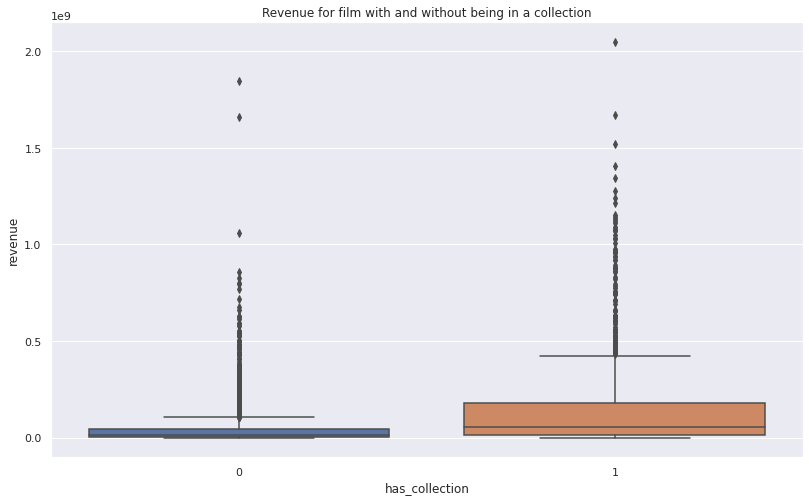

In [ ]:
##has_collection and revenue
df['has_collection'] = [0 if pd.isnull(x) else 1 for x in df['belongs_to_collection']]
print(df['has_collection'].value_counts())

sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_collection', y='revenue', data=df)
plt.title('Revenue for film with and without being in a collection')

0    3449
1    1766
Name: has_homepage, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without homepage')

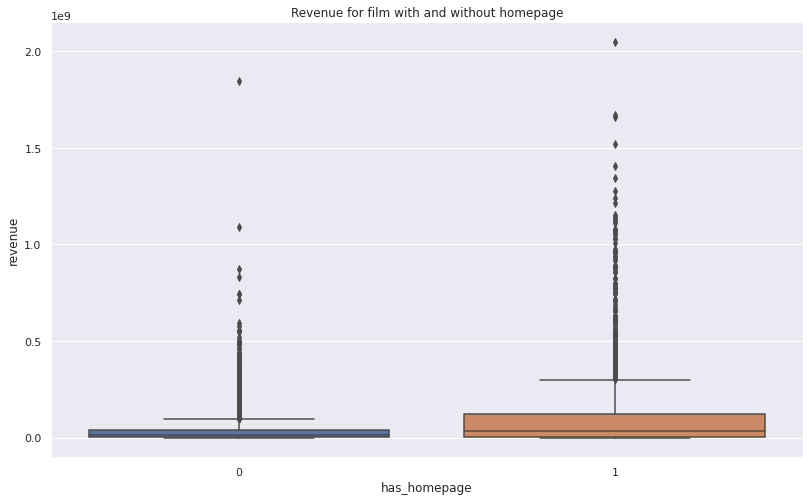

In [ ]:
##homepage and revenue
df['has_homepage'] = [0 if pd.isnull(x) else 1 for x in df['homepage']]
print(df['has_homepage'].value_counts())

sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_homepage', y='revenue', data=df)
plt.title('Revenue for film with and without homepage')

1    4190
0    1025
Name: has_tag, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without tagline')

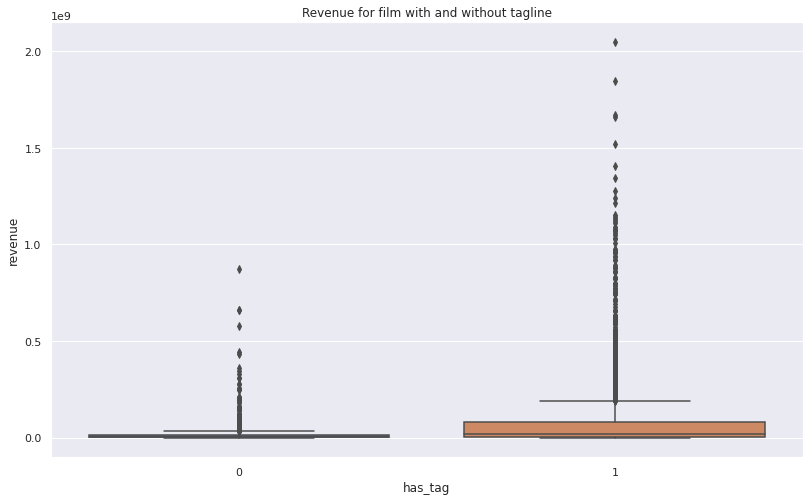

In [ ]:
##tagline and revenue
df['has_tag'] = [0 if len(x) == 0 else 1 for x in df['tagline']]

print(df['has_tag'].value_counts())

sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_tag', y='revenue', data=df)
plt.title('Revenue for film with and without tagline')

Text(0.5, 1.0, 'Revenues for films with multiple genres')

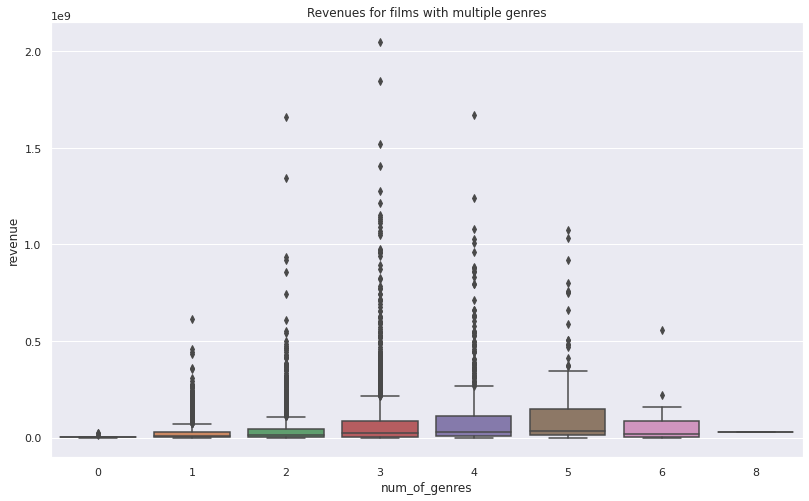

In [ ]:
##Number of Genres per movie and revenues
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_genres', y='revenue', data=df)
plt.title('Revenues for films with multiple genres')

In [ ]:
##genre and revenue
for i, g in enumerate(genres_df.index.values):
    genres_df.loc[g, "median_salary"] = df[df['isGenre_' + g]==1].revenue.median()

genres_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10)

,number_of_movies,median_salary
Drama,2517,10626725.0
Comedy,1882,18753091.0
Thriller,1263,18753438.0
Action,1207,31678778.0
Romance,1008,12387892.5
Adventure,752,57335205.0
Crime,751,19125401.0
Horror,551,12104595.0
ScienceFiction,515,32204030.0
Family,479,49823037.0


Text(0.5, 1.0, 'Sorted movie genres by median revenue')

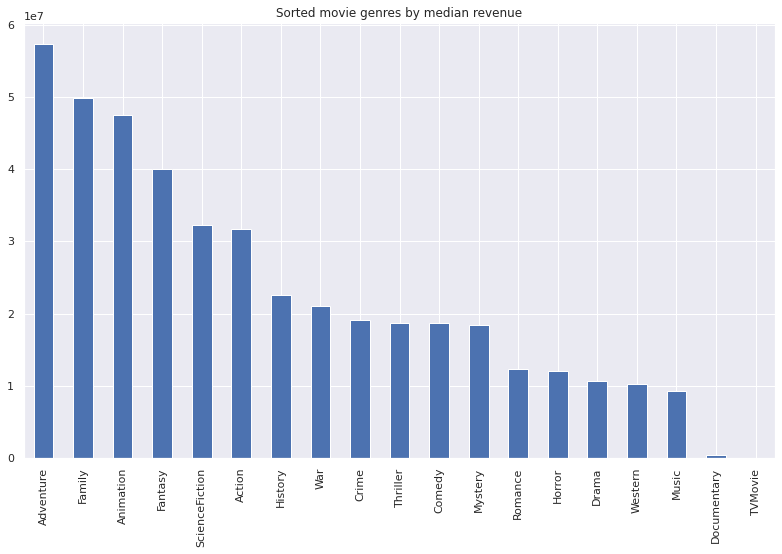

In [ ]:
genres_df.sort_values(by=["median_salary"], ascending=False).median_salary.plot.bar()
plt.title("Sorted movie genres by median revenue")

In [ ]:
for i, p in enumerate(genres_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10).index.values):
    df['isTopGenre_' + p] = df['genres_processed'].apply(lambda x: 1 if p in x else 0)
    df['isTopGenre_Other'] = df['genres_processed'].apply(lambda x: 1 if p not in x else 0)


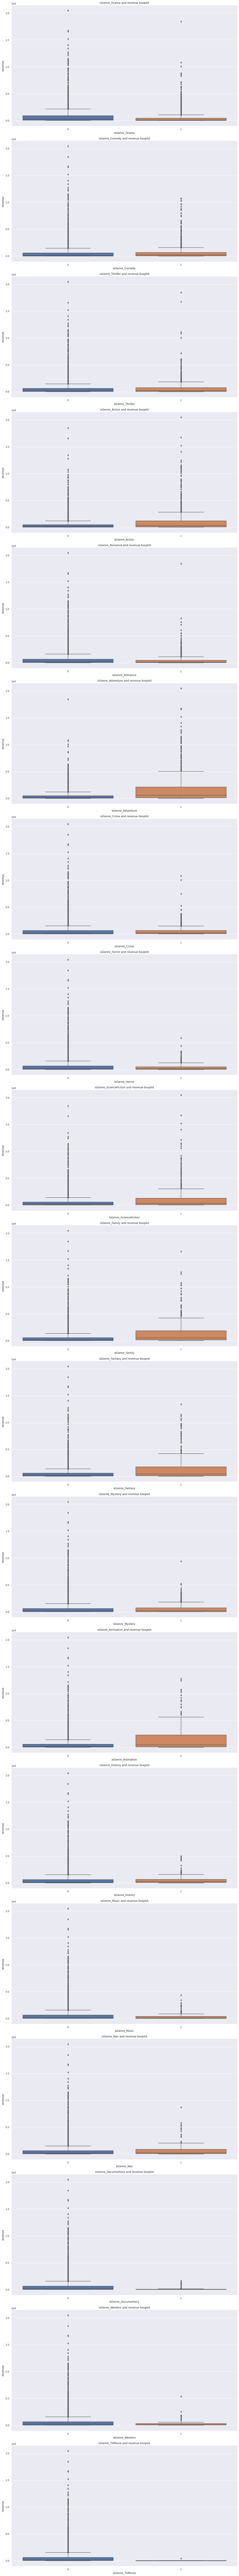

In [ ]:
f, ax = plt.subplots(len(genres_df.index.values), 1, figsize=(15,160))

for i, g in enumerate(genres_df.index.values):
    sns.boxplot(x=df['isGenre_' + g], y='revenue', ax=ax[i], data=df)
    ax[i].set_title('isGenre_' + g +" and revenue boxplot")
f.tight_layout()

Text(0.5, 1.0, 'Revenue for a movie and its original_language')

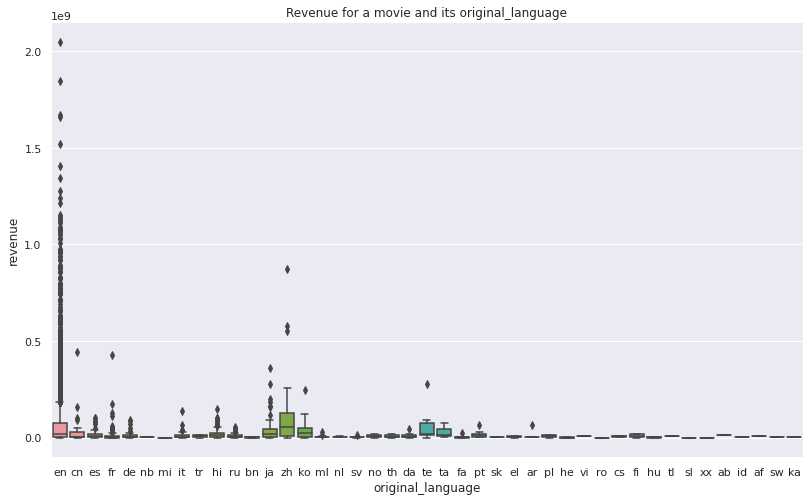

In [ ]:
##original_language and revenue
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='original_language', y='revenue', data=df)
plt.title('Revenue for a movie and its original_language')

Text(0.5, 1.0, 'Revenue for a movie in contrast with english and non-english language')

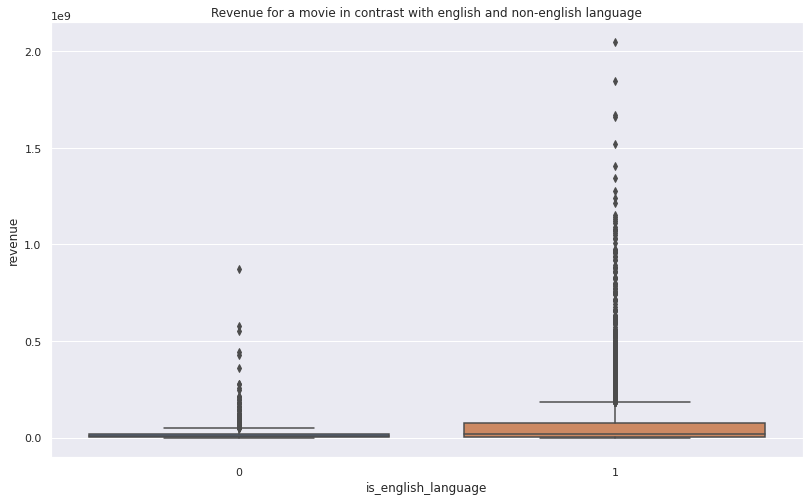

In [ ]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='is_english_language', y='revenue', data=df)
plt.title('Revenue for a movie in contrast with english and non-english language')

Text(0.5, 1.0, 'day_of_week when the movie release and revenue')

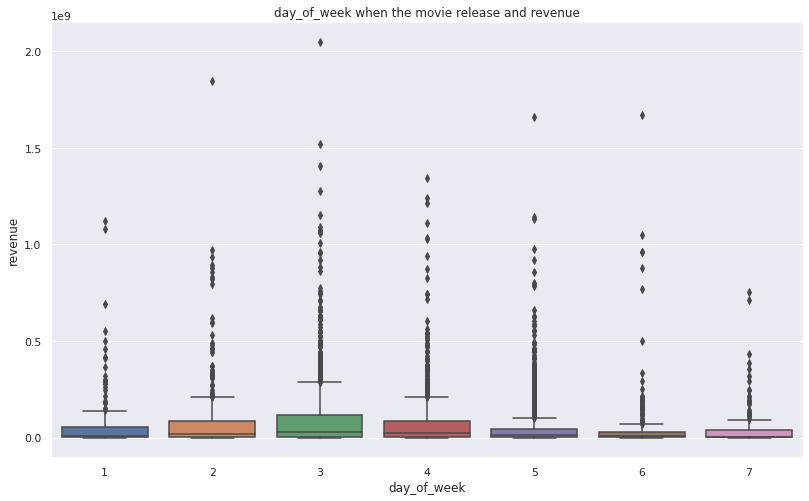

In [ ]:
##day_of_week
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='day_of_week', y='revenue', data=df)
plt.title('day_of_week when the movie release and revenue')

Text(0.5, 1.0, 'day_of_week when the movie release and revenue')

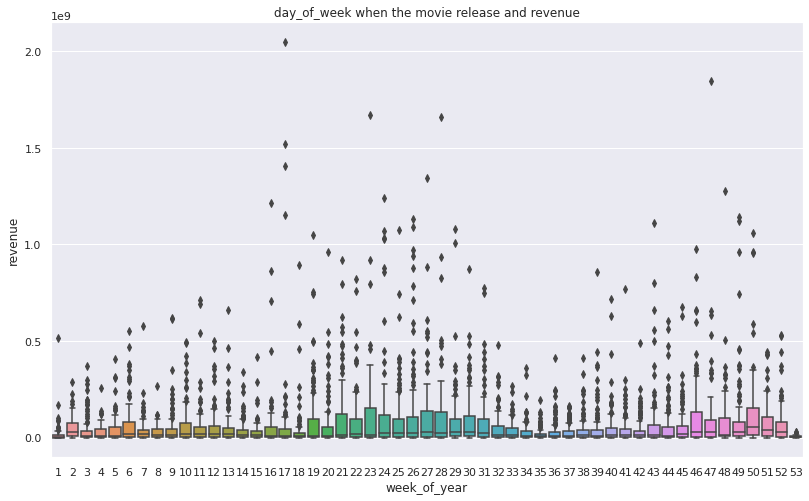

In [ ]:
##Week of year and revenue
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='week_of_year', y='revenue', data=df)
plt.title('day_of_week when the movie release and revenue')

Text(0.5, 1.0, 'month when the movie release and revenue')

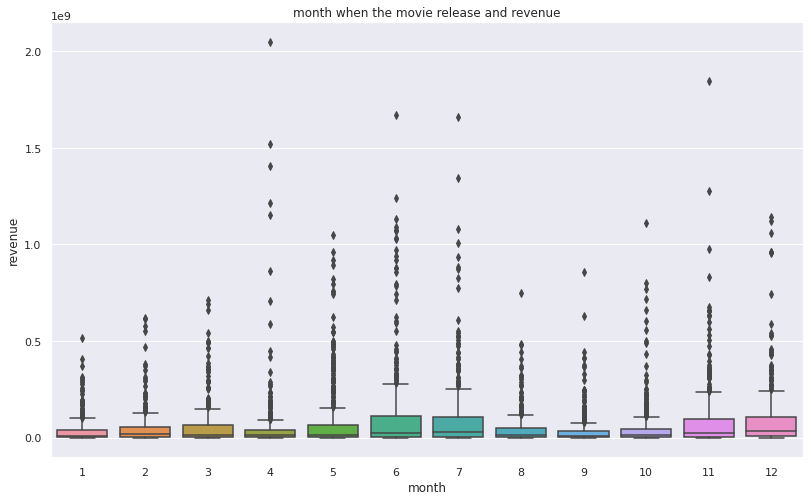

In [ ]:
##Month and revenue
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='month', y='revenue', data=df)
plt.title('month when the movie release and revenue')

Text(0.5, 1.0, 'season when the movie release and revenue')

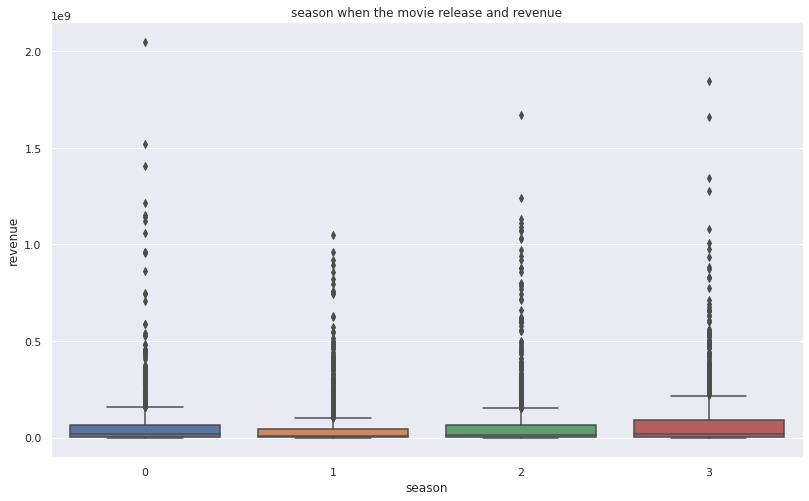

In [ ]:
#Season
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='season', y='revenue', data=df)
plt.title('season when the movie release and revenue')

Text(0.5, 1.0, 'Year when the movie release and revenue')

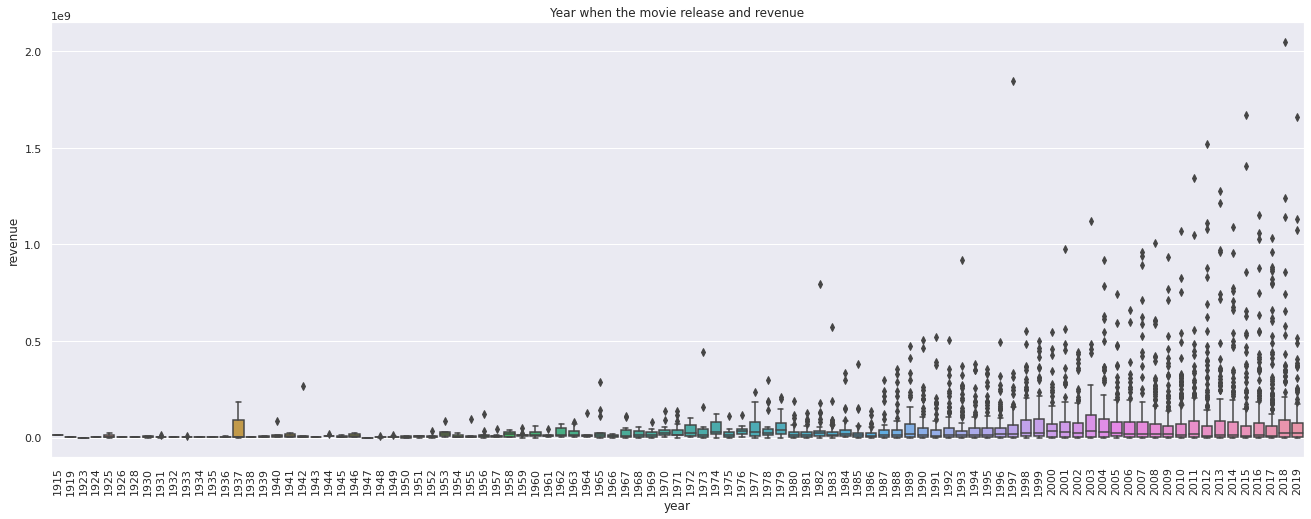

In [ ]:
##Year
sns.set(rc={'figure.figsize':(20, 8)})
g = sns.boxplot(x='year', y='revenue', data=df)
plt.xticks(rotation=90)
plt.title('Year when the movie release and revenue')

Text(0.5, 1.0, 'number of production companies for a movie and revenue')

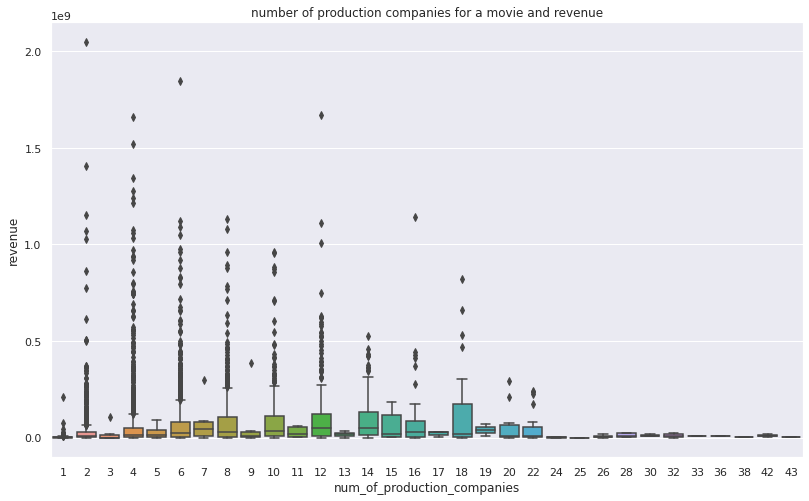

In [ ]:
##Production Companies
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_production_companies', y='revenue', data=df)
plt.title('number of production companies for a movie and revenue')

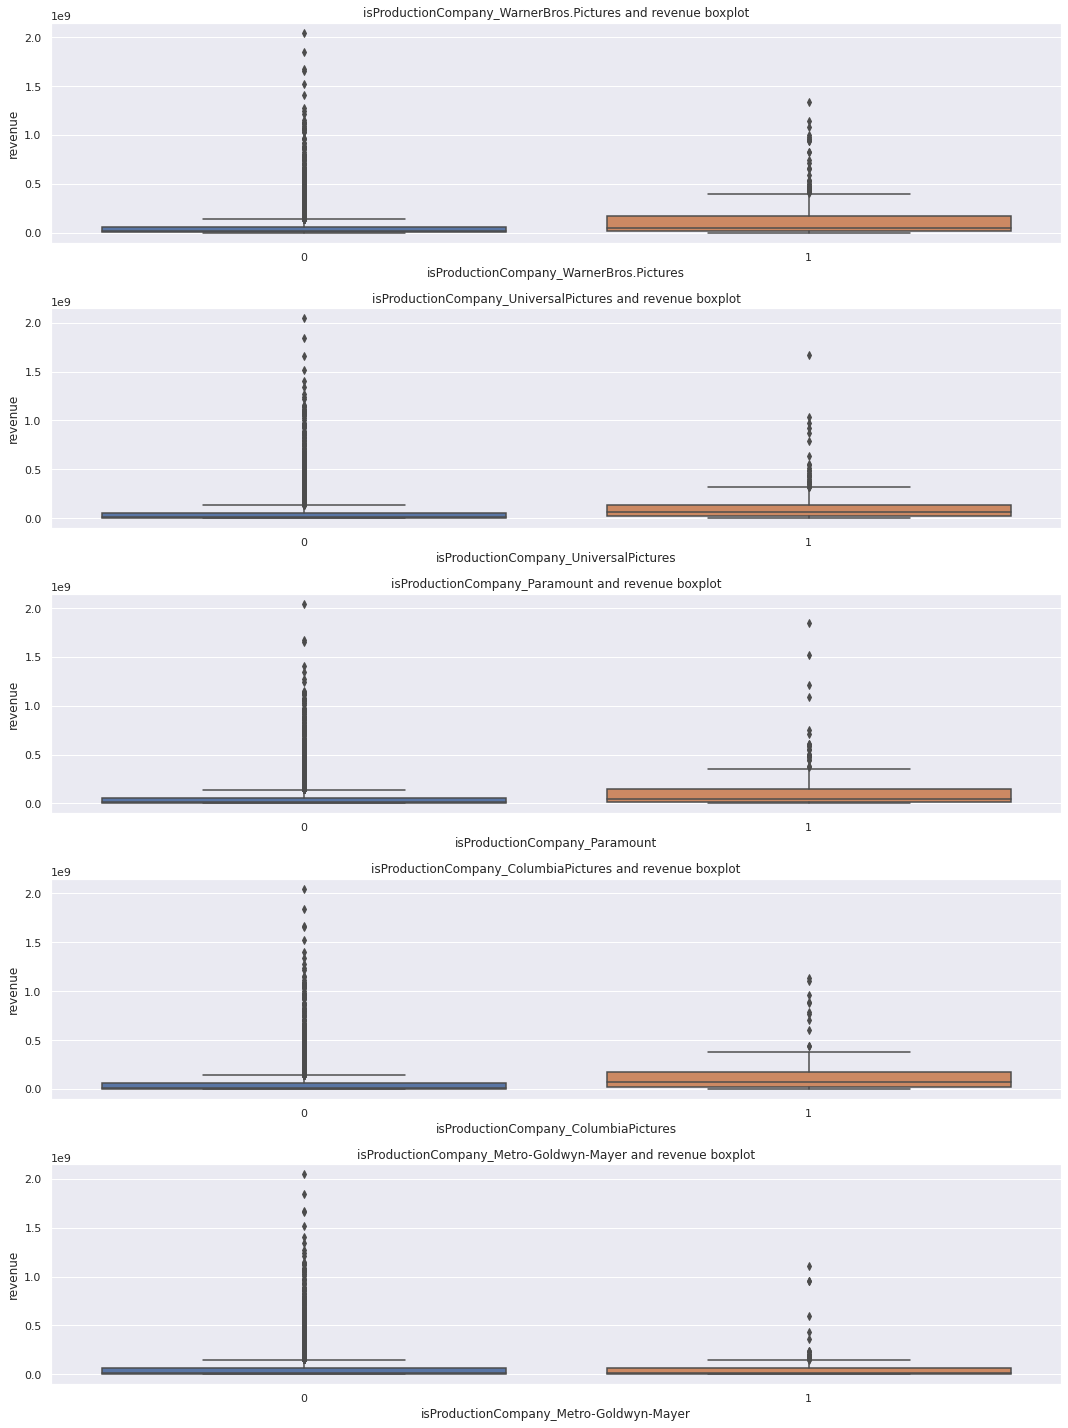

In [ ]:
f, ax = plt.subplots(len(production_companies_df.head(5).index.values), 1, figsize=(15,20))

for i, p in enumerate(production_companies_df.head(5).index.values):
    sns.boxplot(x=df['isProductionCompany_' + p], y='revenue', ax=ax[i], data=df)
    ax[i].set_title('isProductionCompany_' + p +" and revenue boxplot")
f.tight_layout()

ML

In [ ]:
df.columns

Index(['backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview',
       ...
       'isTopGenre_Other', 'isTopGenre_Comedy', 'isTopGenre_Thriller',
       'isTopGenre_Action', 'isTopGenre_Romance', 'isTopGenre_Adventure',
       'isTopGenre_Crime', 'isTopGenre_Horror', 'isTopGenre_ScienceFiction',
       'isTopGenre_Family'],
      dtype='object', length=6026)

In [ ]:
columns = ["log_revenue","log_budget", "log_popularity", "log_runtime", "day_of_week", "year", "month", "week_of_year", "season",
                        "num_genres", "num_of_production_countries", "log_num_of_cast", "log_num_of_male_cast", "log_num_of_female_cast", "has_collection",
                        "has_homepage", "has_tag", "is_english_language",
                       "log_num_of_crew", "log_num_of_male_crew", "log_num_of_female_crew",
                       "log_title_len", "log_overview_len", "log_tagline_len"]



for col in df.columns:
# adding isTopGenre_ columns for features before ML modeling
  if col.startswith('isTopGenre_'):
    columns.append(col)
# adding has_top_actor_ columns for features before ML modeling
  if col.startswith('has_top_actor_'):
    columns.append(col)
# adding has_top_keyword_ columns for features before ML modeling
  if col.startswith('has_top_keyword_'):
    columns.append(col)


columns

['log_revenue',
 'log_budget',
 'log_popularity',
 'log_runtime',
 'day_of_week',
 'year',
 'month',
 'week_of_year',
 'season',
 'num_genres',
 'num_of_production_countries',
 'log_num_of_cast',
 'log_num_of_male_cast',
 'log_num_of_female_cast',
 'has_collection',
 'has_homepage',
 'has_tag',
 'is_english_language',
 'log_num_of_crew',
 'log_num_of_male_crew',
 'log_num_of_female_crew',
 'log_title_len',
 'log_overview_len',
 'log_tagline_len',
 'has_top_actor_Stan Lee',
 'has_top_actor_Samuel L',
 'has_top_actor_Jean',
 'has_top_actor_Jess Harnell',
 'has_top_actor_Robert Downey',
 'has_top_actor_Frank Welker',
 'has_top_actor_John Ratzenberger',
 'has_top_actor_Mickie McGowan',
 'has_top_actor_Sherry Lynn',
 'has_top_actor_Paul Bettany',
 'has_top_keyword_based on',
 'has_top_keyword_duringcreditsstinger',
 'has_top_keyword_sequel',
 'has_top_keyword_superhero',
 'has_top_keyword_aftercreditsstinger',
 'has_top_keyword_3d',
 'has_top_keyword_super power',
 'has_top_keyword_dystopia

In [ ]:
df[columns].head(4)

,log_revenue,log_budget,log_popularity,log_runtime,day_of_week,year,month,week_of_year,season,num_genres,...,isTopGenre_Other,isTopGenre_Comedy,isTopGenre_Thriller,isTopGenre_Action,isTopGenre_Romance,isTopGenre_Adventure,isTopGenre_Crime,isTopGenre_Horror,isTopGenre_ScienceFiction,isTopGenre_Family
0,20.607711,19.368470,3.136537,4.941642,2,2007,5,18,1,3,...,1,0,0,1,0,1,0,0,0,0
1,11.946810,12.429220,1.750243,4.488636,5,1987,4,15,0,2,...,1,1,0,0,0,0,0,1,0,0
2,12.079585,0.000000,1.748504,4.595120,5,2018,7,30,3,1,...,1,0,0,0,0,0,0,0,0,0
3,16.494065,13.815512,2.696517,4.553877,5,1987,9,37,1,1,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
df[columns].isna().sum().sum()

0

In [ ]:
len(columns)

55

In [ ]:
ml_df = df[columns]

In [ ]:

msk = np.random.rand(len(df)) < 0.8

train = ml_df[msk]

test = ml_df[~msk]

In [ ]:
print(len(train))
print(len(test))

4146
1069


In [ ]:
y = train['log_revenue']
X = train.drop('log_revenue',axis = 1)

In [ ]:
X

,log_budget,log_popularity,log_runtime,day_of_week,year,month,week_of_year,season,num_genres,num_of_production_countries,...,isTopGenre_Other,isTopGenre_Comedy,isTopGenre_Thriller,isTopGenre_Action,isTopGenre_Romance,isTopGenre_Adventure,isTopGenre_Crime,isTopGenre_Horror,isTopGenre_ScienceFiction,isTopGenre_Family
0,19.368470,3.136537,4.941642,2,2007,5,18,1,3,1,...,1,0,0,1,0,1,0,0,0,0
1,12.429220,1.750243,4.488636,5,1987,4,15,0,2,1,...,1,1,0,0,0,0,0,1,0,0
3,13.815512,2.696517,4.553877,5,1987,9,37,1,1,1,...,1,0,0,0,0,0,0,1,0,0
5,14.508658,2.019293,4.595120,3,1986,12,1,0,3,2,...,1,0,1,0,0,0,0,1,0,0
6,17.504390,2.771776,4.653960,1,2011,2,7,2,3,2,...,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,0.000000,1.398717,4.477337,3,1985,11,47,3,1,2,...,1,1,0,0,0,0,0,0,0,0
5211,11.350418,2.532108,4.430817,2,1974,10,40,2,1,1,...,1,0,0,0,0,0,0,1,0,0
5212,17.216708,2.191207,4.510860,5,1998,5,22,1,3,1,...,1,1,0,0,0,1,0,0,0,0
5213,16.811243,3.029795,4.691348,5,2004,3,12,3,3,1,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

LinearRegression


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(xtrain,ytrain)
lr_pred=lr_model.predict(xvalid)

In [ ]:
from sklearn.metrics import mean_squared_error

lr_rmse= mean_squared_error(yvalid, lr_pred, squared=False)
lr_rmse

2.3268740323562835

In [ ]:
lr_model

LinearRegression()

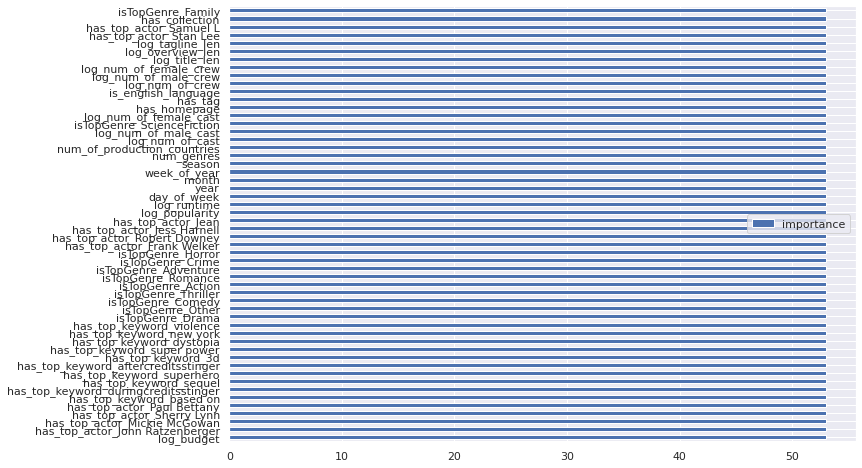

In [ ]:
feature_importances = pd.DataFrame(lr_model.rank_, index = xtrain.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=True)
feature_importances.plot(kind = 'barh', figsize = (10,8))
plt.show()

RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=42,
                                  max_features='auto',
                                  n_estimators= 50,
                                  min_samples_leaf=2)
rfr_model.fit(xtrain,ytrain)
rfr_pred = rfr_model.predict(xvalid)

In [ ]:
from sklearn.metrics import mean_squared_error

rfr_rmse= mean_squared_error(yvalid, rfr_pred, squared=False)
rfr_rmse

2.2460120063916813

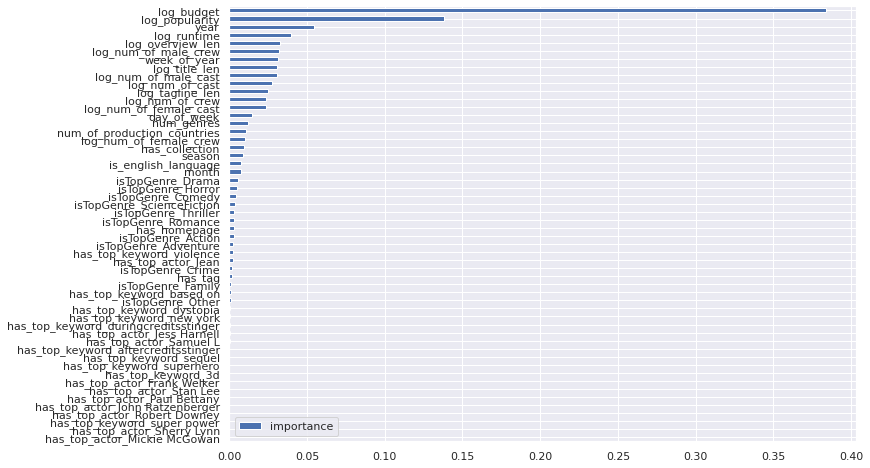

In [ ]:
feature_importances = pd.DataFrame(rfr_model.feature_importances_, index = xtrain.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=True)
feature_importances.plot(kind = 'barh', figsize = (10,8))
plt.show()

xgboost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective = 'reg:linear',
                                  eta = 0.01,
                                  max_depth = 3,
                                  min_child_weight = 3,
                                  subsample = 0.8,
                                  gamma = 1.45,
                                  colsample_bytree = 0.7,
                                  eval_metric = 'rmse',
                                  seed = 42,
                                  n_estimators = 3000)

In [ ]:

xgb_model.fit(xtrain, ytrain)

xgb_pred = xgb_model.predict(xvalid)
xgb_rmse= mean_squared_error(yvalid, xgb_pred, squared=False)
xgb_rmse

[12:32:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


2.2669374666064677

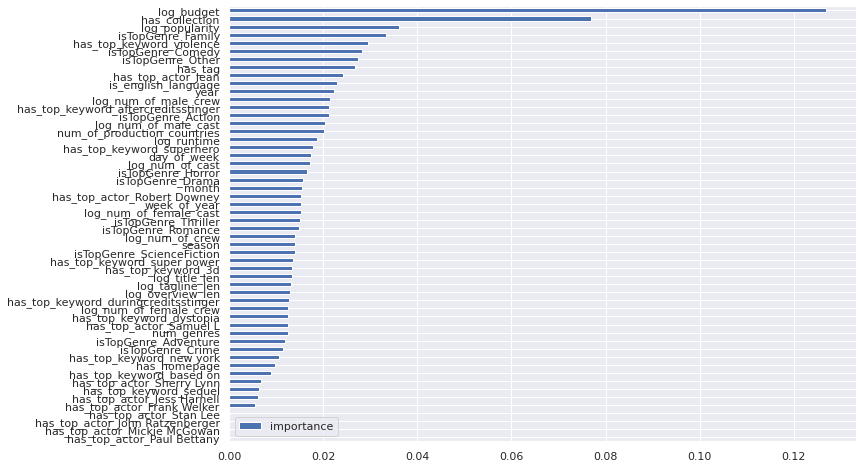

In [ ]:
feature_importances = pd.DataFrame(xgb_model.feature_importances_, index = xtrain.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=True)
feature_importances.plot(kind = 'barh', figsize = (10,8))
plt.show()

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap
explainer = shap.TreeExplainer(rfr_model)
shap_values = explainer.shap_values(X)

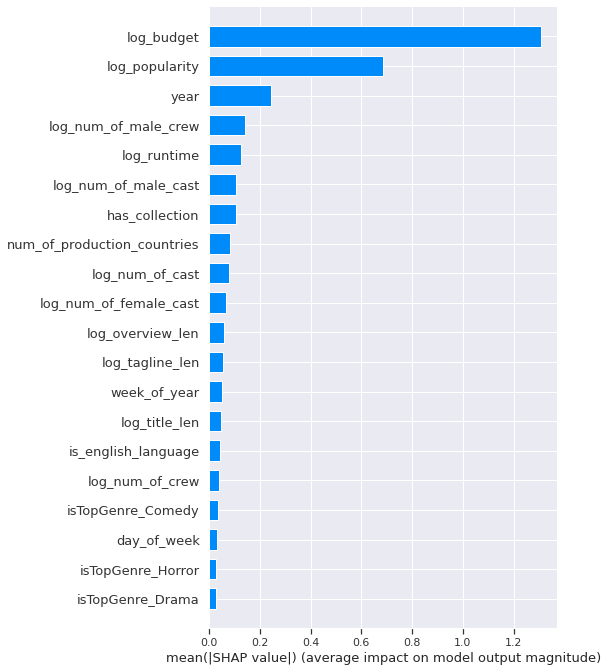

In [ ]:
shap.summary_plot(shap_values, X.values, plot_type="bar", feature_names = X.columns)

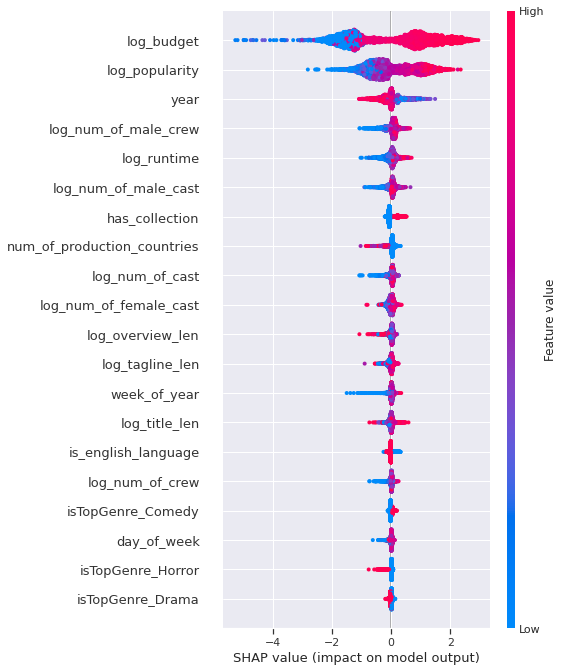

In [ ]:
shap.summary_plot(shap_values, X.values, feature_names = X.columns)

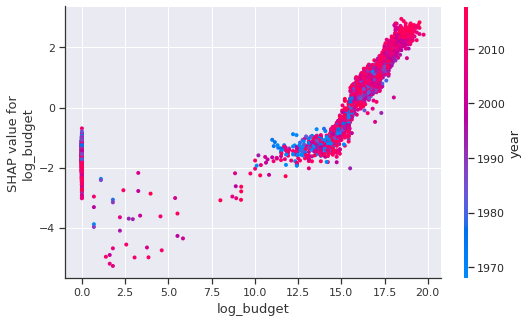

In [ ]:
shap.dependence_plot(0, shap_values, X.values, feature_names=X.columns)

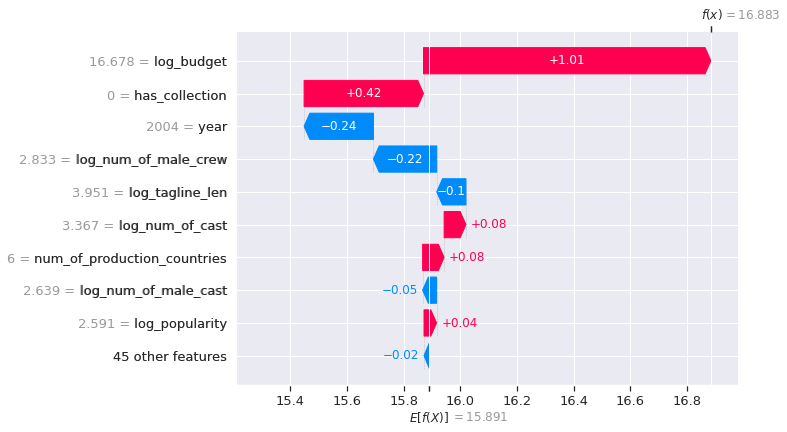

In [ ]:
row = 7
shap.waterfall_plot(shap.Explanation(values=shap_values[row],
                                              base_values=explainer.expected_value[0], data=xvalid.iloc[row],
                                         feature_names=xvalid.columns.tolist()))